# Enhanced Report Display - Individual Models vs Ensemble

This notebook displays comprehensive results comparing individual feature-based models with ensemble performance.

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import glob
from scipy.stats import ttest_rel

# Feature types used in your project
FEATURE_TYPES = [
    'mel_spectrogram', 'mfcc', 'chromagram', 'spectral_contrast',
    'tonnetz', 'constant_q', 'cqt', 'stft', 'harmonic_percussive', 'onset_strength'
]

In [2]:
# Find and load the latest ensemble results
ensemble_results_files = sorted(glob.glob("ensemble_results/ensemble_results_*.json"), reverse=True)
if not ensemble_results_files:
    raise FileNotFoundError("No ensemble results file found in ensemble_results/ directory.")
ENSEMBLE_RESULTS_PATH = ensemble_results_files[0]

with open(ENSEMBLE_RESULTS_PATH, "r") as file:
    ensemble_results = json.load(file)

print(f"Loaded ensemble results from: {ENSEMBLE_RESULTS_PATH}")

Loaded ensemble results from: ensemble_results/ensemble_results_2025_07_07.json


In [3]:
# Load individual model results for all feature types
individual_results = {}
for feature_type in FEATURE_TYPES:
    results_path = f"models/{feature_type}/results.json"
    if os.path.exists(results_path):
        with open(results_path, "r") as f:
            individual_results[feature_type] = json.load(f)
    else:
        print(f"Results not found for {feature_type}")

In [4]:
# Display ensemble accuracy statistics
accs = ensemble_results['accuracy_list']
print("Ensemble Accuracies (per fold):", accs)
print(f"Mean Ensemble Accuracy: {np.mean(accs):.4f}")
print(f"Std Ensemble Accuracy: {np.std(accs):.4f}")
print(f"Min Ensemble Accuracy: {np.min(accs):.4f}")
print(f"Max Ensemble Accuracy: {np.max(accs):.4f}")

Ensemble Accuracies (per fold): [0.9611111111111111, 0.9777777777777777, 0.9611111111111111, 0.9888888888888889, 0.9222222222222223]
Mean Ensemble Accuracy: 0.9622
Std Ensemble Accuracy: 0.0226
Min Ensemble Accuracy: 0.9222
Max Ensemble Accuracy: 0.9889


In [5]:
# Display ensemble classification reports for each fold
for i, report in enumerate(ensemble_results['classification_reports']):
    print(f"\nEnsemble Classification Report for Fold {i+1}:")
    display(pd.DataFrame(report).transpose())


Ensemble Classification Report for Fold 1:


precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   23.000000
1              1.000000  1.000000  1.000000   22.000000
2              0.960000  0.960000  0.960000   25.000000
3              0.818182  1.000000  0.900000   18.000000
4              1.000000  1.000000  1.000000   17.000000
5              0.875000  0.875000  0.875000   16.000000
6              1.000000  0.950000  0.974359   20.000000
7              1.000000  0.850000  0.918919   20.000000
8              1.000000  1.000000  1.000000   19.000000
accuracy       0.961111  0.961111  0.961111    0.961111
macro avg      0.961465  0.959444  0.958698  180.000000
weighted avg   0.965152  0.961111  0.961475  180.000000


Ensemble Classification Report for Fold 2:


precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   21.000000
1              1.000000  1.000000  1.000000   19.000000
2              1.000000  1.000000  1.000000   23.000000
3              1.000000  1.000000  1.000000   22.000000
4              0.958333  0.920000  0.938776   25.000000
5              0.950000  1.000000  0.974359   19.000000
6              1.000000  0.866667  0.928571   15.000000
7              0.904762  1.000000  0.950000   19.000000
8              1.000000  1.000000  1.000000   17.000000
accuracy       0.977778  0.977778  0.977778    0.977778
macro avg      0.979233  0.976296  0.976856  180.000000
weighted avg   0.978882  0.977778  0.977560  180.000000


Ensemble Classification Report for Fold 3:


precision    recall  f1-score     support
0              0.944444  1.000000  0.971429   17.000000
1              1.000000  1.000000  1.000000   19.000000
2              0.888889  0.941176  0.914286   17.000000
3              1.000000  1.000000  1.000000   22.000000
4              0.923077  0.923077  0.923077   13.000000
5              1.000000  0.956522  0.977778   23.000000
6              1.000000  0.920000  0.958333   25.000000
7              0.920000  0.920000  0.920000   25.000000
8              0.950000  1.000000  0.974359   19.000000
accuracy       0.961111  0.961111  0.961111    0.961111
macro avg      0.958490  0.962308  0.959918  180.000000
weighted avg   0.962315  0.961111  0.961207  180.000000


Ensemble Classification Report for Fold 4:


precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   17.000000
1              1.000000  1.000000  1.000000   21.000000
2              1.000000  1.000000  1.000000   19.000000
3              1.000000  1.000000  1.000000   23.000000
4              0.960000  1.000000  0.979592   24.000000
5              1.000000  0.952381  0.975610   21.000000
6              1.000000  1.000000  1.000000   18.000000
7              0.941176  1.000000  0.969697   16.000000
8              1.000000  0.952381  0.975610   21.000000
accuracy       0.988889  0.988889  0.988889    0.988889
macro avg      0.989020  0.989418  0.988945  180.000000
weighted avg   0.989438  0.988889  0.988894  180.000000


Ensemble Classification Report for Fold 5:


precision    recall  f1-score     support
0              0.916667  1.000000  0.956522   22.000000
1              1.000000  0.894737  0.944444   19.000000
2              1.000000  0.812500  0.896552   16.000000
3              0.937500  1.000000  0.967742   15.000000
4              1.000000  0.904762  0.950000   21.000000
5              0.863636  0.904762  0.883721   21.000000
6              0.913043  0.954545  0.933333   22.000000
7              0.818182  0.900000  0.857143   20.000000
8              0.916667  0.916667  0.916667   24.000000
accuracy       0.922222  0.922222  0.922222    0.922222
macro avg      0.929522  0.920886  0.922903  180.000000
weighted avg   0.926756  0.922222  0.922407  180.000000

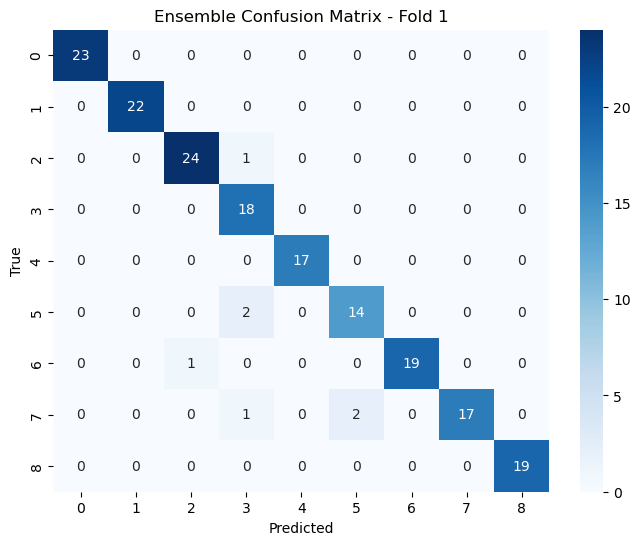

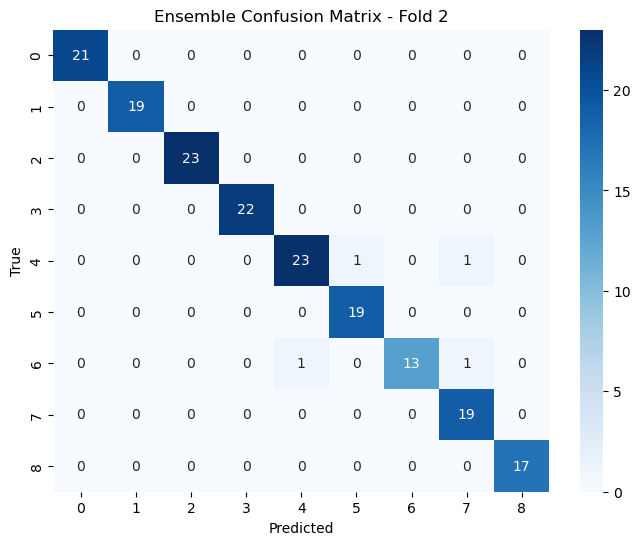

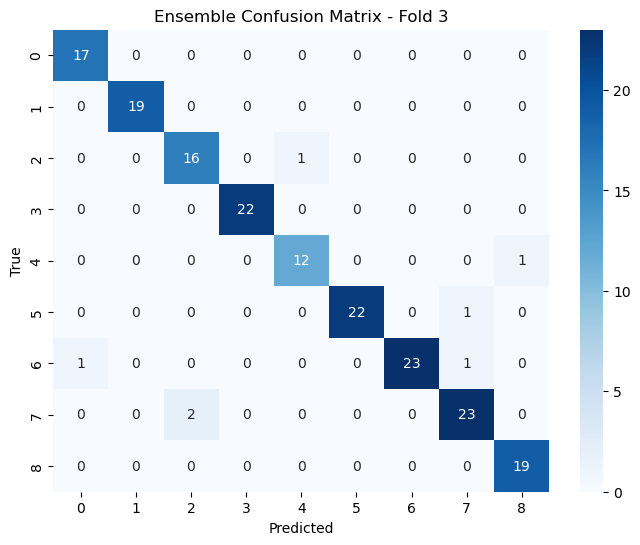

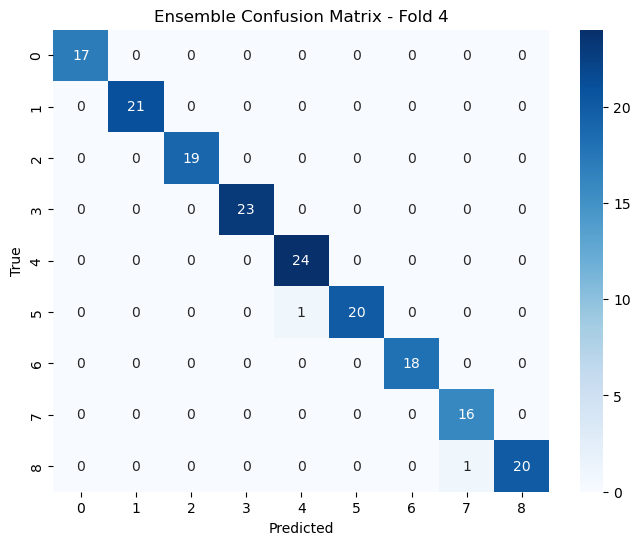

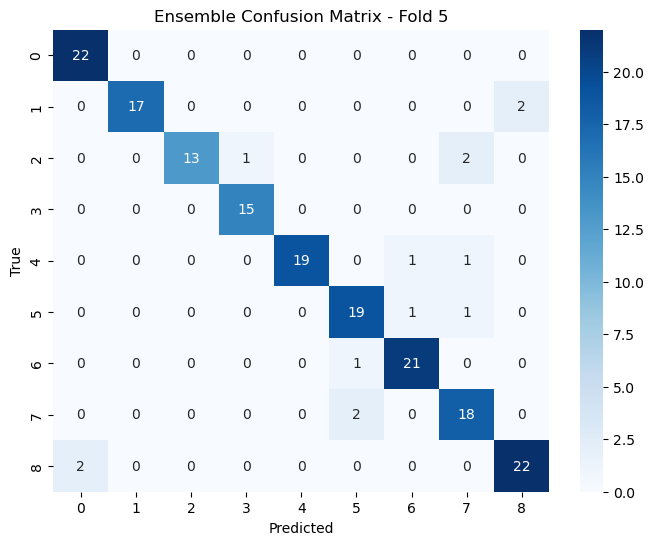

In [6]:
# Display ensemble confusion matrices for each fold
for i, conf_matrix in enumerate(ensemble_results['confusion_matrices']):
    plt.figure(figsize=(8, 6))
    sns.heatmap(np.array(conf_matrix), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Ensemble Confusion Matrix - Fold {i+1}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [7]:
# Create a summary DataFrame for individual models
performance_data = []
for feature_type, results in individual_results.items():
    accuracies = results['accuracy_list']
    losses = results['loss_list']
    performance_data.append({
        'Feature Type': feature_type.replace('_', ' ').title(),
        'Mean Accuracy': np.mean(accuracies),
        'Std Accuracy': np.std(accuracies),
        'Min Accuracy': np.min(accuracies),
        'Max Accuracy': np.max(accuracies),
        'Mean Loss': np.mean(losses),
        'Std Loss': np.std(losses)
    })

performance_df = pd.DataFrame(performance_data)
performance_df = performance_df.sort_values('Mean Accuracy', ascending=False)
display(performance_df.round(4))

Feature Type  Mean Accuracy  Std Accuracy  Min Accuracy  \
8  Harmonic Percussive         0.9167        0.0165        0.9000   
0      Mel Spectrogram         0.8878        0.0432        0.8056   
6                  Cqt         0.8789        0.0506        0.7944   
1                 Mfcc         0.8767        0.0206        0.8556   
5           Constant Q         0.8733        0.0231        0.8389   
7                 Stft         0.6511        0.0995        0.5000   
3    Spectral Contrast         0.5733        0.0642        0.4722   
2           Chromagram         0.3956        0.0373        0.3278   
4              Tonnetz         0.3300        0.0428        0.2722   
9       Onset Strength         0.2144        0.0303        0.1722   

   Max Accuracy  Mean Loss  Std Loss  
8        0.9389    53.2391   24.4559  
0        0.9333     6.3668    1.5847  
6        0.9333     2.1835    1.0728  
1        0.9111     0.5232    0.1400  
5        0.9111     2.3014    0.7442  
7        0.8000    17.8898    4.9604  
3        0.6722     1.2847    0.1913  
2        0.4278     2.0387    0.1178  
4        0.3667     2.3058    0.3379  
9        0.2500     2.1147    0.0805


Mel Spectrogram Model
Accuracies: [0.9055555462837219, 0.894444465637207, 0.9333333373069763, 0.8055555820465088, 0.8999999761581421]
Mean: 0.8878, Std: 0.0432, Min: 0.8056, Max: 0.9333

Classification Report for Fold 1:


precision    recall  f1-score     support
0              0.920000  1.000000  0.958333   23.000000
1              1.000000  1.000000  1.000000   22.000000
2              0.888889  0.960000  0.923077   25.000000
3              0.857143  1.000000  0.923077   18.000000
4              0.882353  0.882353  0.882353   17.000000
5              0.823529  0.875000  0.848485   16.000000
6              0.888889  0.800000  0.842105   20.000000
7              1.000000  0.650000  0.787879   20.000000
8              0.900000  0.947368  0.923077   19.000000
accuracy       0.905556  0.905556  0.905556    0.905556
macro avg      0.906756  0.901636  0.898710  180.000000
weighted avg   0.910361  0.905556  0.902488  180.000000


Classification Report for Fold 2:


precision    recall  f1-score     support
0              1.000000  0.904762  0.950000   21.000000
1              0.904762  1.000000  0.950000   19.000000
2              0.851852  1.000000  0.920000   23.000000
3              0.954545  0.954545  0.954545   22.000000
4              0.954545  0.840000  0.893617   25.000000
5              0.730769  1.000000  0.844444   19.000000
6              0.928571  0.866667  0.896552   15.000000
7              0.818182  0.473684  0.600000   19.000000
8              0.944444  1.000000  0.971429   17.000000
accuracy       0.894444  0.894444  0.894444    0.894444
macro avg      0.898630  0.893295  0.886732  180.000000
weighted avg   0.900338  0.894444  0.888375  180.000000


Classification Report for Fold 3:


precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   17.000000
1              1.000000  0.947368  0.972973   19.000000
2              0.888889  0.941176  0.914286   17.000000
3              1.000000  0.909091  0.952381   22.000000
4              1.000000  0.923077  0.960000   13.000000
5              0.920000  1.000000  0.958333   23.000000
6              0.884615  0.920000  0.901961   25.000000
7              0.875000  0.840000  0.857143   25.000000
8              0.900000  0.947368  0.923077   19.000000
accuracy       0.933333  0.933333  0.933333    0.933333
macro avg      0.940945  0.936453  0.937795  180.000000
weighted avg   0.935342  0.933333  0.933441  180.000000


Classification Report for Fold 4:


precision    recall  f1-score     support
0              1.000000  0.941176  0.969697   17.000000
1              1.000000  0.714286  0.833333   21.000000
2              0.633333  1.000000  0.775510   19.000000
3              1.000000  0.826087  0.904762   23.000000
4              0.875000  0.583333  0.700000   24.000000
5              0.708333  0.809524  0.755556   21.000000
6              0.937500  0.833333  0.882353   18.000000
7              0.500000  0.875000  0.636364   16.000000
8              1.000000  0.761905  0.864865   21.000000
accuracy       0.805556  0.805556  0.805556    0.805556
macro avg      0.850463  0.816072  0.813604  180.000000
weighted avg   0.859907  0.805556  0.813456  180.000000


Classification Report for Fold 5:


precision    recall  f1-score  support
0              1.000000  1.000000  1.000000     22.0
1              0.941176  0.842105  0.888889     19.0
2              1.000000  0.875000  0.933333     16.0
3              0.882353  1.000000  0.937500     15.0
4              0.904762  0.904762  0.904762     21.0
5              0.826087  0.904762  0.863636     21.0
6              1.000000  1.000000  1.000000     22.0
7              0.750000  0.600000  0.666667     20.0
8              0.821429  0.958333  0.884615     24.0
accuracy       0.900000  0.900000  0.900000      0.9
macro avg      0.902867  0.898329  0.897711    180.0
weighted avg   0.900999  0.900000  0.897695    180.0

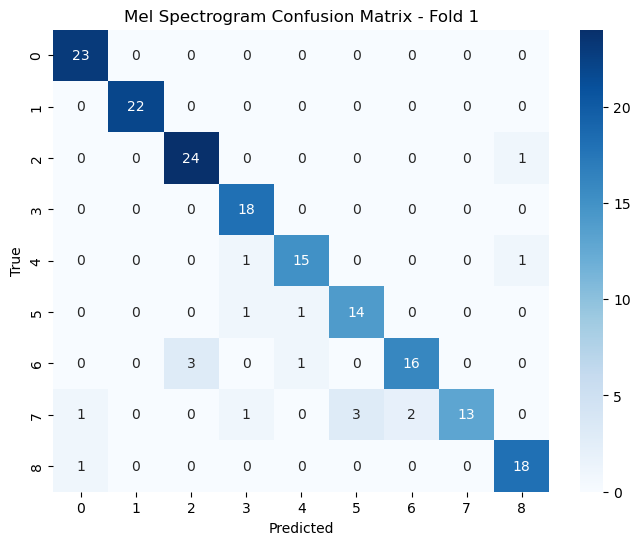

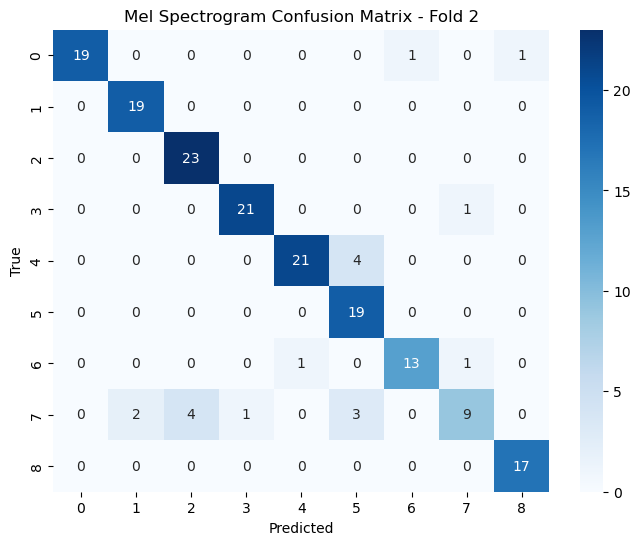

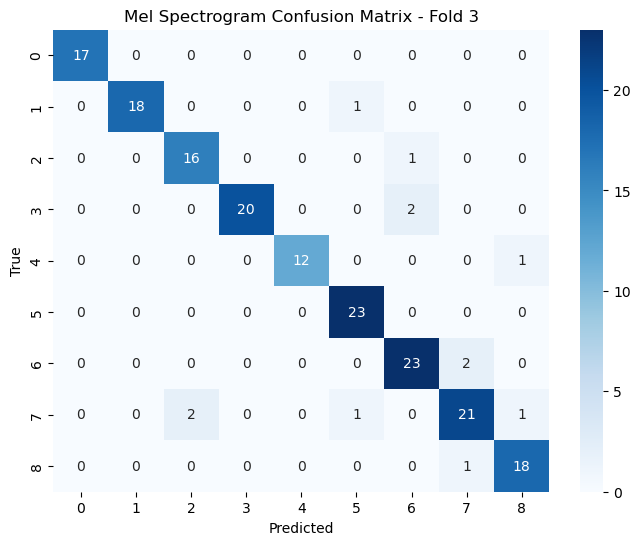

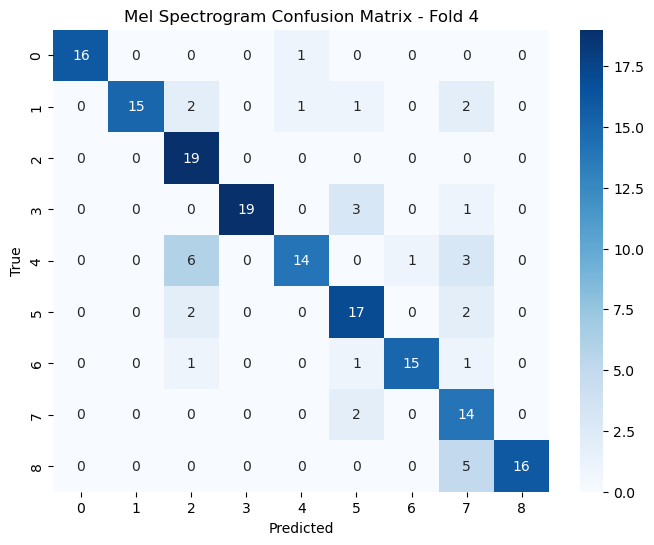

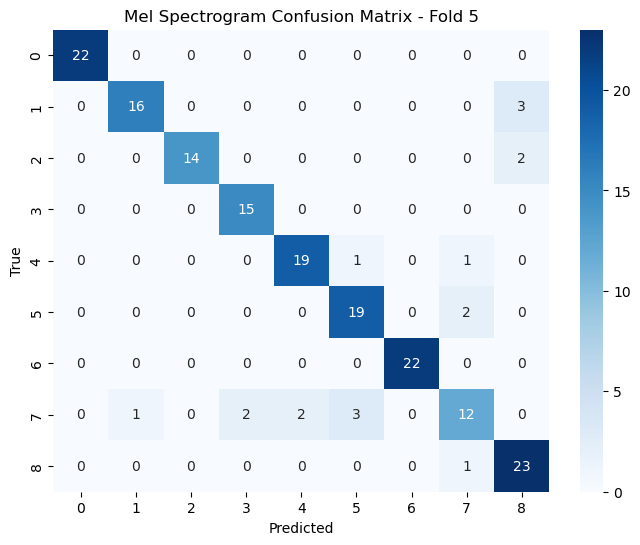


Mfcc Model
Accuracies: [0.8888888955116272, 0.8666666746139526, 0.855555534362793, 0.9111111164093018, 0.8611111044883728]
Mean: 0.8767, Std: 0.0206, Min: 0.8556, Max: 0.9111

Classification Report for Fold 1:


precision    recall  f1-score     support
0              0.958333  1.000000  0.978723   23.000000
1              1.000000  1.000000  1.000000   22.000000
2              0.900000  0.720000  0.800000   25.000000
3              0.900000  1.000000  0.947368   18.000000
4              0.928571  0.764706  0.838710   17.000000
5              0.933333  0.875000  0.903226   16.000000
6              0.730769  0.950000  0.826087   20.000000
7              0.739130  0.850000  0.790698   20.000000
8              1.000000  0.842105  0.914286   19.000000
accuracy       0.888889  0.888889  0.888889    0.888889
macro avg      0.898904  0.889090  0.888789  180.000000
weighted avg   0.899215  0.888889  0.888778  180.000000


Classification Report for Fold 2:


precision    recall  f1-score     support
0              1.000000  0.857143  0.923077   21.000000
1              0.950000  1.000000  0.974359   19.000000
2              0.791667  0.826087  0.808511   23.000000
3              0.814815  1.000000  0.897959   22.000000
4              1.000000  0.840000  0.913043   25.000000
5              0.933333  0.736842  0.823529   19.000000
6              0.823529  0.933333  0.875000   15.000000
7              0.636364  0.736842  0.682927   19.000000
8              0.937500  0.882353  0.909091   17.000000
accuracy       0.866667  0.866667  0.866667    0.866667
macro avg      0.876356  0.868067  0.867500  180.000000
weighted avg   0.879439  0.866667  0.868203  180.000000


Classification Report for Fold 3:


precision    recall  f1-score     support
0              0.800000  0.941176  0.864865   17.000000
1              1.000000  0.789474  0.882353   19.000000
2              0.789474  0.882353  0.833333   17.000000
3              0.950000  0.863636  0.904762   22.000000
4              0.923077  0.923077  0.923077   13.000000
5              1.000000  0.782609  0.878049   23.000000
6              0.840000  0.840000  0.840000   25.000000
7              0.689655  0.800000  0.740741   25.000000
8              0.857143  0.947368  0.900000   19.000000
accuracy       0.855556  0.855556  0.855556    0.855556
macro avg      0.872150  0.863299  0.863020  180.000000
weighted avg   0.869156  0.855556  0.857514  180.000000


Classification Report for Fold 4:


precision    recall  f1-score     support
0              0.944444  1.000000  0.971429   17.000000
1              1.000000  0.952381  0.975610   21.000000
2              0.944444  0.894737  0.918919   19.000000
3              0.880000  0.956522  0.916667   23.000000
4              0.923077  1.000000  0.960000   24.000000
5              0.869565  0.952381  0.909091   21.000000
6              0.812500  0.722222  0.764706   18.000000
7              0.909091  0.625000  0.740741   16.000000
8              0.913043  1.000000  0.954545   21.000000
accuracy       0.911111  0.911111  0.911111    0.911111
macro avg      0.910685  0.900360  0.901301  180.000000
weighted avg   0.911106  0.911111  0.907432  180.000000


Classification Report for Fold 5:


precision    recall  f1-score     support
0              0.954545  0.954545  0.954545   22.000000
1              0.720000  0.947368  0.818182   19.000000
2              0.722222  0.812500  0.764706   16.000000
3              0.882353  1.000000  0.937500   15.000000
4              0.909091  0.952381  0.930233   21.000000
5              0.947368  0.857143  0.900000   21.000000
6              0.894737  0.772727  0.829268   22.000000
7              0.866667  0.650000  0.742857   20.000000
8              0.869565  0.833333  0.851064   24.000000
accuracy       0.861111  0.861111  0.861111    0.861111
macro avg      0.862950  0.864444  0.858706  180.000000
weighted avg   0.868576  0.861111  0.860026  180.000000

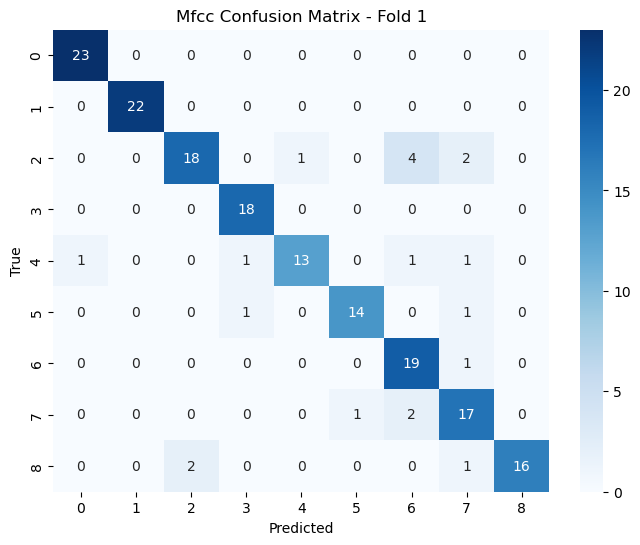

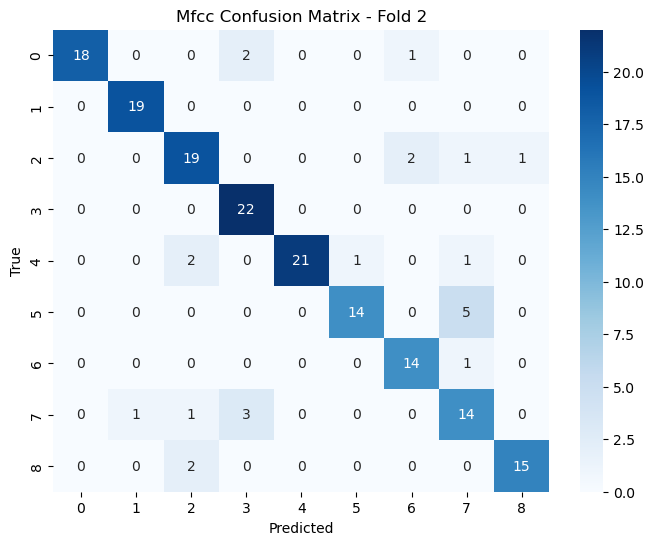

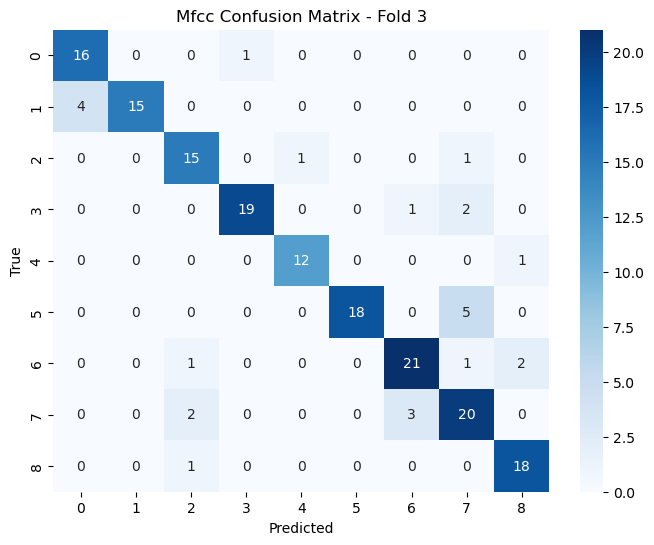

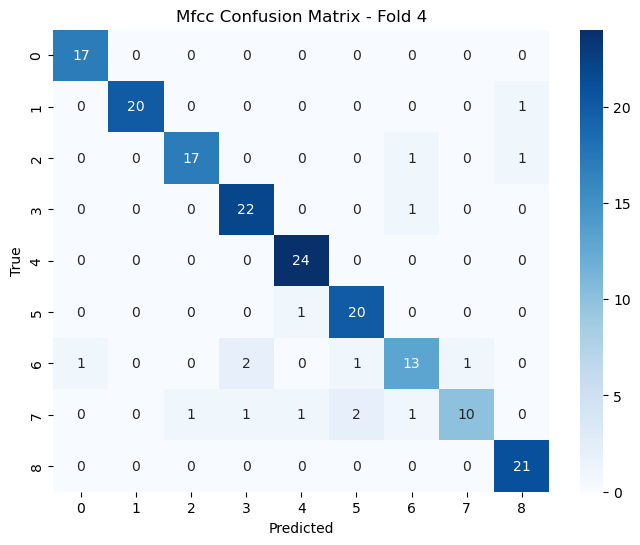

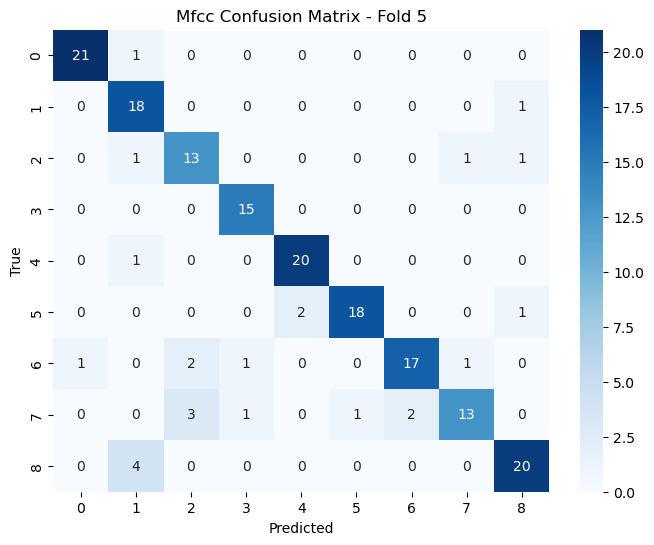


Chromagram Model
Accuracies: [0.32777777314186096, 0.42222222685813904, 0.4277777671813965, 0.38333332538604736, 0.4166666567325592]
Mean: 0.3956, Std: 0.0373, Min: 0.3278, Max: 0.4278

Classification Report for Fold 1:


precision    recall  f1-score     support
0              0.294118  0.434783  0.350877   23.000000
1              0.933333  0.636364  0.756757   22.000000
2              0.407407  0.440000  0.423077   25.000000
3              0.333333  0.055556  0.095238   18.000000
4              0.229508  0.823529  0.358974   17.000000
5              0.428571  0.187500  0.260870   16.000000
6              0.136364  0.150000  0.142857   20.000000
7              0.000000  0.000000  0.000000   20.000000
8              0.375000  0.157895  0.222222   19.000000
accuracy       0.327778  0.327778  0.327778    0.327778
macro avg      0.348626  0.320625  0.290097  180.000000
weighted avg   0.356079  0.327778  0.302033  180.000000


Classification Report for Fold 2:


precision    recall  f1-score     support
0              0.411765  0.666667  0.509091   21.000000
1              0.466667  0.736842  0.571429   19.000000
2              0.333333  0.478261  0.392857   23.000000
3              0.818182  0.409091  0.545455   22.000000
4              0.705882  0.480000  0.571429   25.000000
5              0.428571  0.157895  0.230769   19.000000
6              0.269231  0.466667  0.341463   15.000000
7              0.100000  0.052632  0.068966   19.000000
8              0.416667  0.294118  0.344828   17.000000
accuracy       0.422222  0.422222  0.422222    0.422222
macro avg      0.438922  0.415797  0.397365  180.000000
weighted avg   0.455512  0.422222  0.408603  180.000000


Classification Report for Fold 3:


precision    recall  f1-score     support
0              0.357143  0.294118  0.322581   17.000000
1              0.714286  0.789474  0.750000   19.000000
2              0.555556  0.588235  0.571429   17.000000
3              0.214286  0.136364  0.166667   22.000000
4              0.777778  0.538462  0.636364   13.000000
5              0.611111  0.478261  0.536585   23.000000
6              0.157895  0.120000  0.136364   25.000000
7              0.222222  0.160000  0.186047   25.000000
8              0.387755  1.000000  0.558824   19.000000
accuracy       0.427778  0.427778  0.427778    0.427778
macro avg      0.444226  0.456101  0.429429  180.000000
weighted avg   0.415770  0.427778  0.402261  180.000000


Classification Report for Fold 4:


precision    recall  f1-score     support
0              0.290323  0.529412  0.375000   17.000000
1              0.833333  0.238095  0.370370   21.000000
2              0.250000  0.210526  0.228571   19.000000
3              0.448276  0.565217  0.500000   23.000000
4              0.482759  0.583333  0.528302   24.000000
5              0.375000  0.285714  0.324324   21.000000
6              0.230769  0.166667  0.193548   18.000000
7              0.166667  0.250000  0.200000   16.000000
8              0.687500  0.523810  0.594595   21.000000
accuracy       0.383333  0.383333  0.383333    0.383333
macro avg      0.418292  0.372531  0.368301  180.000000
weighted avg   0.434528  0.383333  0.381422  180.000000


Classification Report for Fold 5:


precision    recall  f1-score     support
0              0.692308  0.409091  0.514286   22.000000
1              0.578947  0.578947  0.578947   19.000000
2              0.185185  0.312500  0.232558   16.000000
3              0.478261  0.733333  0.578947   15.000000
4              0.571429  0.571429  0.571429   21.000000
5              0.315789  0.285714  0.300000   21.000000
6              0.370370  0.454545  0.408163   22.000000
7              0.157895  0.150000  0.153846   20.000000
8              0.666667  0.333333  0.444444   24.000000
accuracy       0.416667  0.416667  0.416667    0.416667
macro avg      0.446317  0.425433  0.420291  180.000000
weighted avg   0.457251  0.416667  0.420792  180.000000

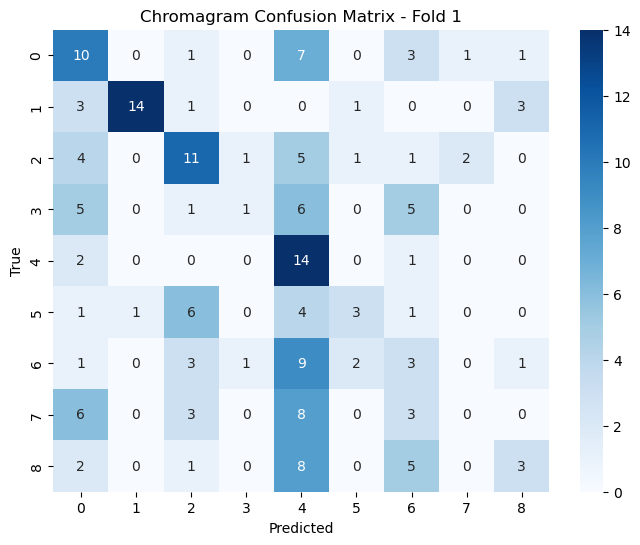

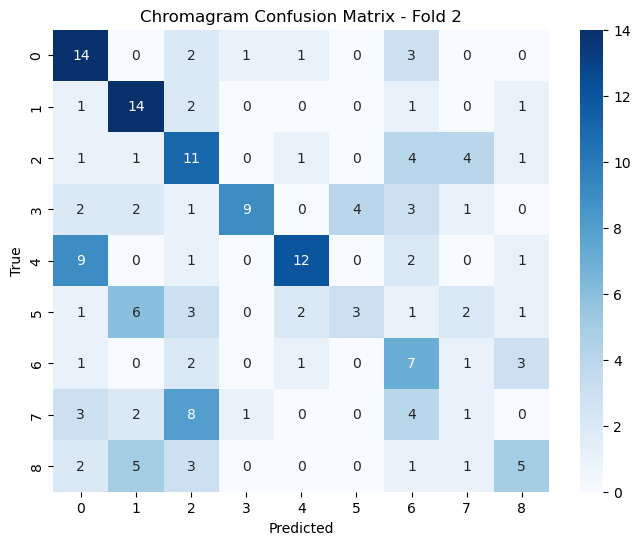

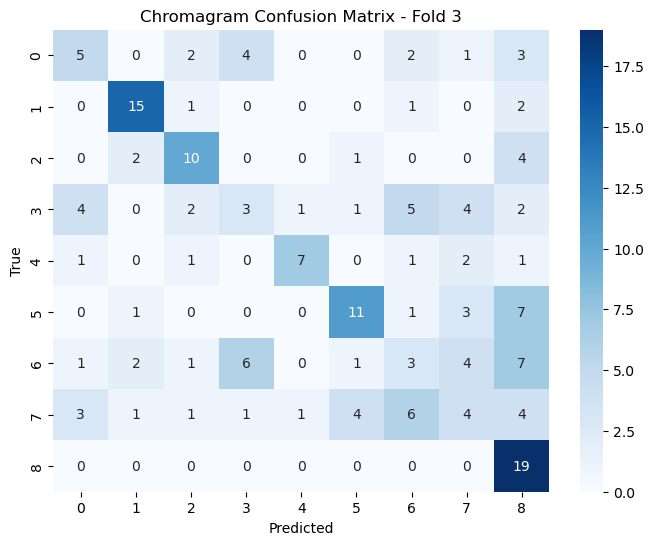

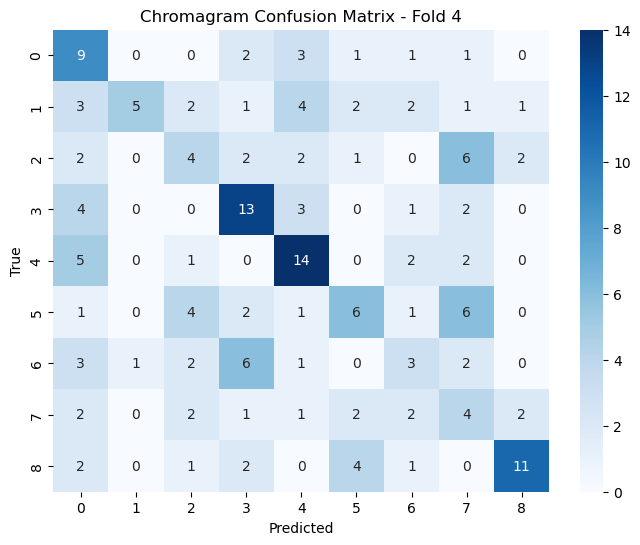

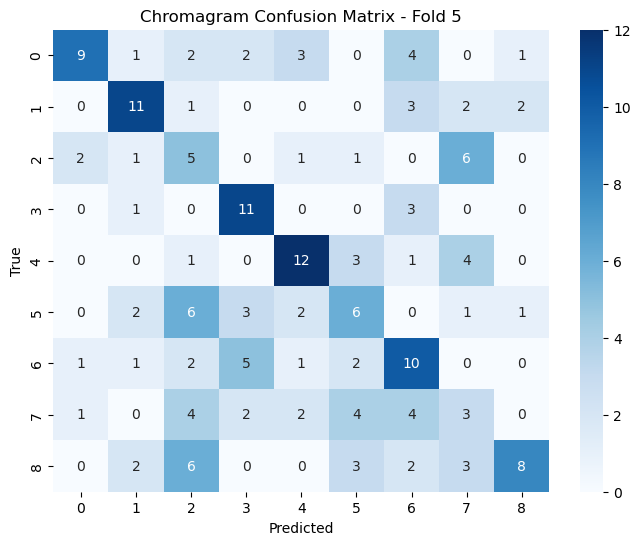


Spectral Contrast Model
Accuracies: [0.6722221970558167, 0.5777778029441833, 0.5555555820465088, 0.5888888835906982, 0.4722222089767456]
Mean: 0.5733, Std: 0.0642, Min: 0.4722, Max: 0.6722

Classification Report for Fold 1:


precision    recall  f1-score     support
0              0.611111  0.478261  0.536585   23.000000
1              0.846154  1.000000  0.916667   22.000000
2              0.818182  0.720000  0.765957   25.000000
3              0.523810  0.611111  0.564103   18.000000
4              0.647059  0.647059  0.647059   17.000000
5              0.777778  0.437500  0.560000   16.000000
6              0.590909  0.650000  0.619048   20.000000
7              0.571429  0.600000  0.585366   20.000000
8              0.666667  0.842105  0.744186   19.000000
accuracy       0.672222  0.672222  0.672222    0.672222
macro avg      0.672566  0.665115  0.659886  180.000000
weighted avg   0.677288  0.672222  0.666660  180.000000


Classification Report for Fold 2:


precision    recall  f1-score     support
0              0.466667  0.333333  0.388889   21.000000
1              0.680000  0.894737  0.772727   19.000000
2              0.846154  0.478261  0.611111   23.000000
3              0.481481  0.590909  0.530612   22.000000
4              0.620690  0.720000  0.666667   25.000000
5              0.545455  0.315789  0.400000   19.000000
6              0.400000  0.400000  0.400000   15.000000
7              0.517241  0.789474  0.625000   19.000000
8              0.687500  0.647059  0.666667   17.000000
accuracy       0.577778  0.577778  0.577778    0.577778
macro avg      0.582799  0.574396  0.562408  180.000000
weighted avg   0.589834  0.577778  0.566958  180.000000


Classification Report for Fold 3:


precision    recall  f1-score     support
0              0.466667  0.411765  0.437500   17.000000
1              0.736842  0.736842  0.736842   19.000000
2              0.875000  0.823529  0.848485   17.000000
3              0.600000  0.272727  0.375000   22.000000
4              0.370370  0.769231  0.500000   13.000000
5              0.535714  0.652174  0.588235   23.000000
6              0.521739  0.480000  0.500000   25.000000
7              0.448276  0.520000  0.481481   25.000000
8              0.692308  0.473684  0.562500   19.000000
accuracy       0.555556  0.555556  0.555556    0.555556
macro avg      0.582991  0.571106  0.558894  180.000000
weighted avg   0.580827  0.555556  0.552032  180.000000


Classification Report for Fold 4:


precision    recall  f1-score     support
0              0.444444  0.235294  0.307692   17.000000
1              0.900000  0.857143  0.878049   21.000000
2              0.521739  0.631579  0.571429   19.000000
3              0.578947  0.478261  0.523810   23.000000
4              0.487805  0.833333  0.615385   24.000000
5              0.650000  0.619048  0.634146   21.000000
6              0.444444  0.666667  0.533333   18.000000
7              0.625000  0.312500  0.416667   16.000000
8              0.846154  0.523810  0.647059   21.000000
accuracy       0.588889  0.588889  0.588889    0.588889
macro avg      0.610948  0.573070  0.569730  180.000000
weighted avg   0.615616  0.588889  0.580643  180.000000


Classification Report for Fold 5:


precision    recall  f1-score     support
0              0.666667  0.363636  0.470588   22.000000
1              0.423077  0.578947  0.488889   19.000000
2              0.333333  0.750000  0.461538   16.000000
3              0.357143  0.666667  0.465116   15.000000
4              0.785714  0.523810  0.628571   21.000000
5              0.600000  0.428571  0.500000   21.000000
6              0.727273  0.363636  0.484848   22.000000
7              0.222222  0.200000  0.210526   20.000000
8              0.600000  0.500000  0.545455   24.000000
accuracy       0.472222  0.472222  0.472222    0.472222
macro avg      0.523937  0.486141  0.472837  180.000000
weighted avg   0.540778  0.472222  0.475952  180.000000

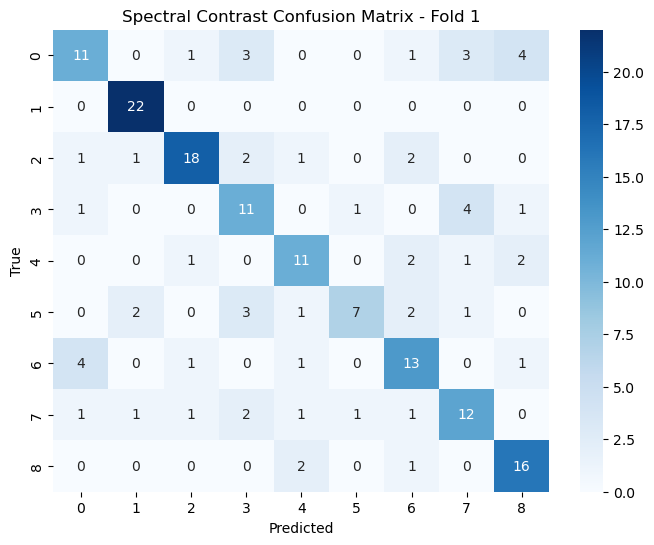

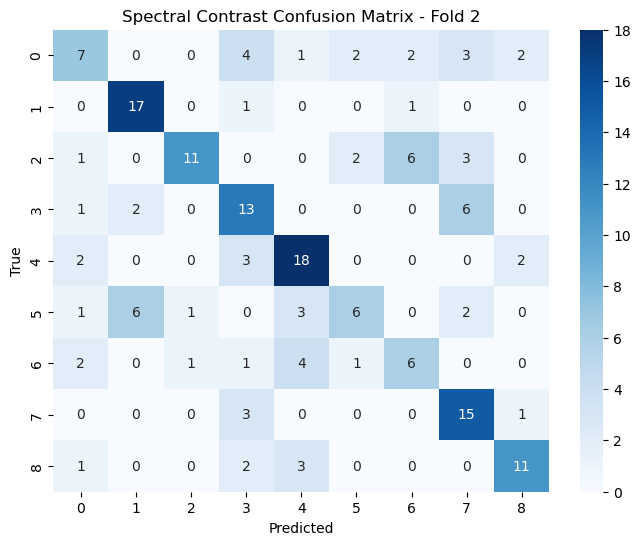

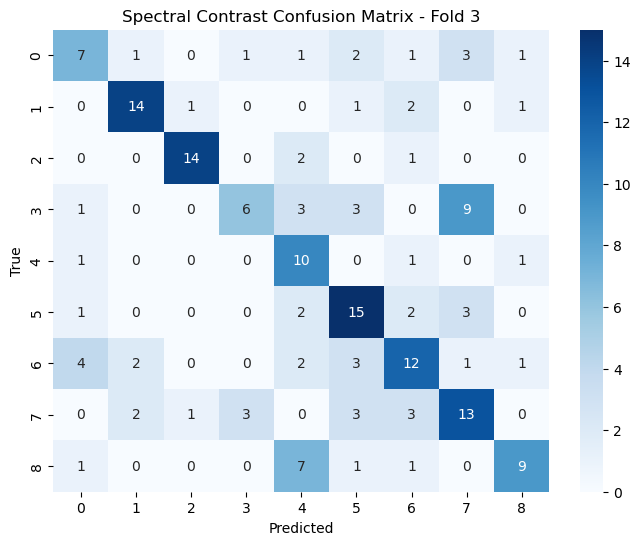

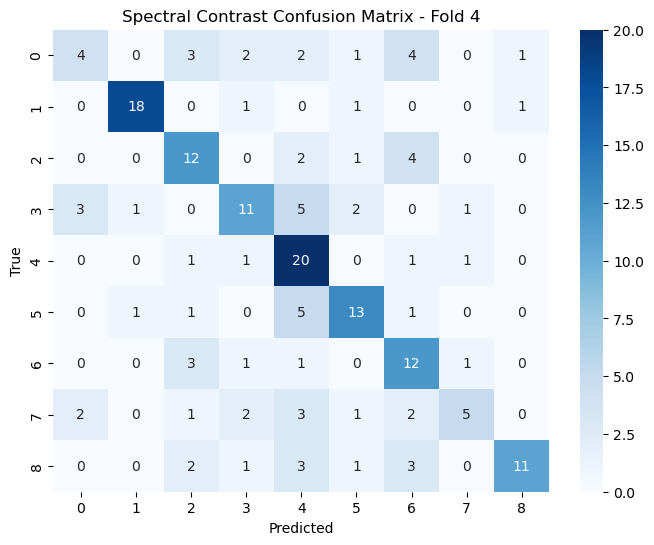

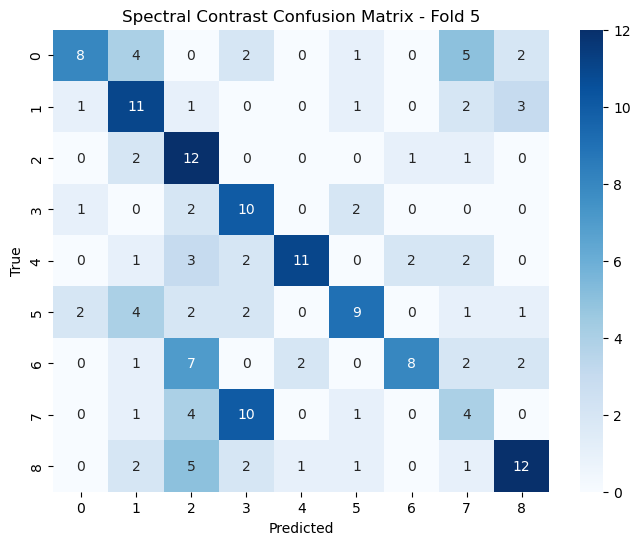


Tonnetz Model
Accuracies: [0.36666667461395264, 0.28333333134651184, 0.3611111044883728, 0.36666667461395264, 0.27222222089767456]
Mean: 0.3300, Std: 0.0428, Min: 0.2722, Max: 0.3667

Classification Report for Fold 1:


precision    recall  f1-score     support
0              0.500000  0.652174  0.566038   23.000000
1              0.789474  0.681818  0.731707   22.000000
2              0.400000  0.160000  0.228571   25.000000
3              0.153846  0.222222  0.181818   18.000000
4              0.384615  0.294118  0.333333   17.000000
5              0.315789  0.375000  0.342857   16.000000
6              0.244898  0.600000  0.347826   20.000000
7              0.285714  0.100000  0.148148   20.000000
8              0.428571  0.157895  0.230769   19.000000
accuracy       0.366667  0.366667  0.366667    0.366667
macro avg      0.389212  0.360359  0.345674  180.000000
weighted avg   0.399910  0.366667  0.353111  180.000000


Classification Report for Fold 2:


precision    recall  f1-score     support
0              0.222222  0.190476  0.205128   21.000000
1              0.400000  0.631579  0.489796   19.000000
2              1.000000  0.173913  0.296296   23.000000
3              0.147059  0.227273  0.178571   22.000000
4              0.363636  0.160000  0.222222   25.000000
5              0.280000  0.368421  0.318182   19.000000
6              0.066667  0.133333  0.088889   15.000000
7              0.555556  0.263158  0.357143   19.000000
8              0.421053  0.470588  0.444444   17.000000
accuracy       0.283333  0.283333  0.283333    0.283333
macro avg      0.384021  0.290971  0.288964  180.000000
weighted avg   0.397924  0.283333  0.286849  180.000000


Classification Report for Fold 3:


precision    recall  f1-score     support
0              0.333333  0.176471  0.230769   17.000000
1              0.666667  0.421053  0.516129   19.000000
2              0.538462  0.411765  0.466667   17.000000
3              0.100000  0.045455  0.062500   22.000000
4              0.315789  0.461538  0.375000   13.000000
5              0.350000  0.608696  0.444444   23.000000
6              0.272727  0.120000  0.166667   25.000000
7              0.270270  0.400000  0.322581   25.000000
8              0.448276  0.684211  0.541667   19.000000
accuracy       0.361111  0.361111  0.361111    0.361111
macro avg      0.366169  0.369910  0.347380  180.000000
weighted avg   0.355192  0.361111  0.336989  180.000000


Classification Report for Fold 4:


precision    recall  f1-score     support
0              0.411765  0.411765  0.411765   17.000000
1              0.432432  0.761905  0.551724   21.000000
2              0.550000  0.578947  0.564103   19.000000
3              0.187500  0.260870  0.218182   23.000000
4              0.285714  0.083333  0.129032   24.000000
5              0.533333  0.380952  0.444444   21.000000
6              0.166667  0.166667  0.166667   18.000000
7              0.166667  0.125000  0.142857   16.000000
8              0.500000  0.523810  0.511628   21.000000
accuracy       0.366667  0.366667  0.366667    0.366667
macro avg      0.359342  0.365916  0.348934  180.000000
weighted avg   0.361486  0.366667  0.348791  180.000000


Classification Report for Fold 5:


precision    recall  f1-score     support
0              0.400000  0.090909  0.148148   22.000000
1              0.296296  0.421053  0.347826   19.000000
2              0.500000  0.437500  0.466667   16.000000
3              0.120000  0.200000  0.150000   15.000000
4              1.000000  0.095238  0.173913   21.000000
5              0.555556  0.476190  0.512821   21.000000
6              0.114754  0.318182  0.168675   22.000000
7              0.250000  0.050000  0.083333   20.000000
8              0.375000  0.375000  0.375000   24.000000
accuracy       0.272222  0.272222  0.272222    0.272222
macro avg      0.401290  0.273786  0.269598  180.000000
weighted avg   0.407894  0.272222  0.268797  180.000000

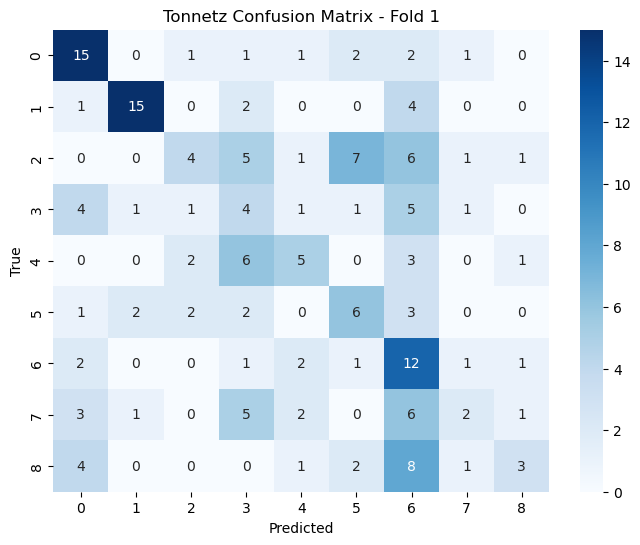

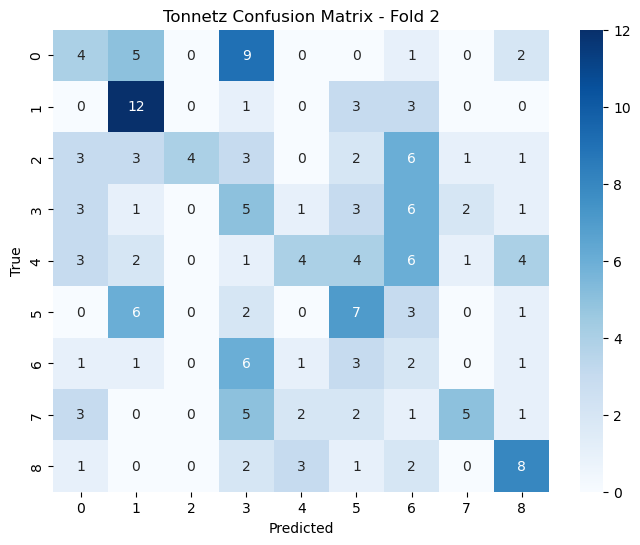

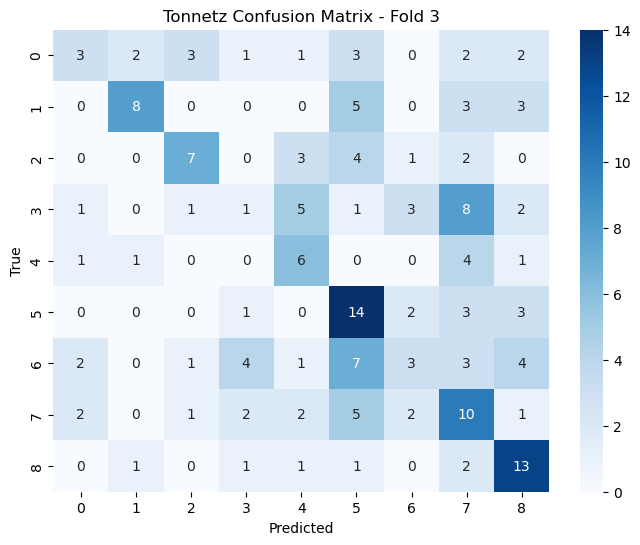

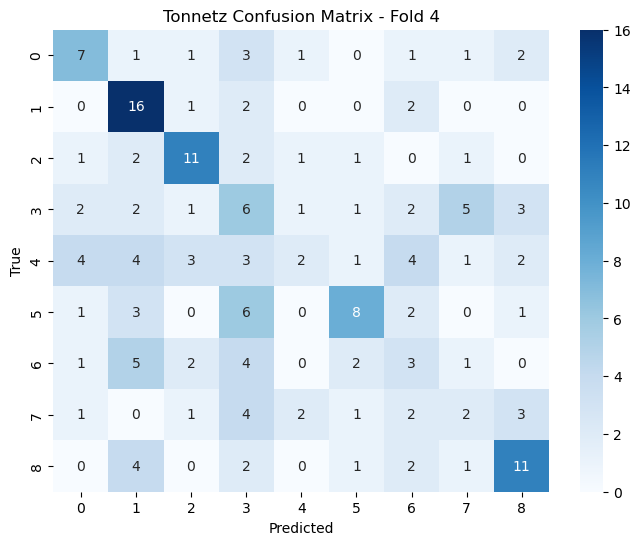

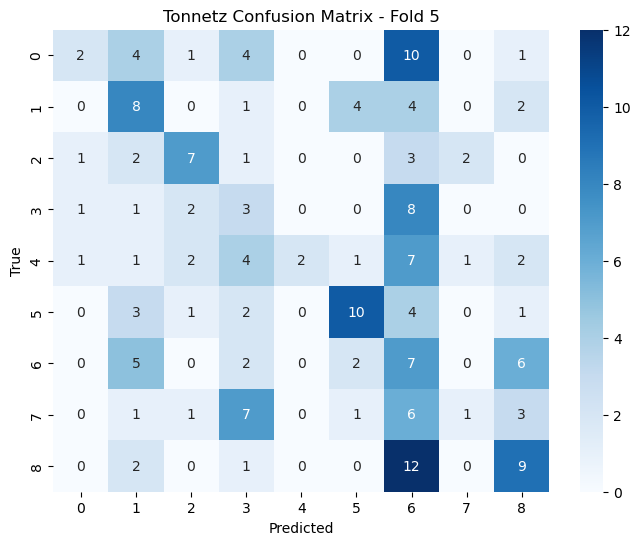


Constant Q Model
Accuracies: [0.9111111164093018, 0.8388888835906982, 0.8666666746139526, 0.8722222447395325, 0.8777777552604675]
Mean: 0.8733, Std: 0.0231, Min: 0.8389, Max: 0.9111

Classification Report for Fold 1:


precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   23.000000
1              1.000000  1.000000  1.000000   22.000000
2              0.800000  0.960000  0.872727   25.000000
3              0.818182  1.000000  0.900000   18.000000
4              0.772727  1.000000  0.871795   17.000000
5              1.000000  0.625000  0.769231   16.000000
6              1.000000  0.800000  0.888889   20.000000
7              0.937500  0.750000  0.833333   20.000000
8              1.000000  1.000000  1.000000   19.000000
accuracy       0.911111  0.911111  0.911111    0.911111
macro avg      0.925379  0.903889  0.903997  180.000000
weighted avg   0.925631  0.911111  0.908838  180.000000


Classification Report for Fold 2:


precision    recall  f1-score     support
0              0.950000  0.904762  0.926829   21.000000
1              1.000000  1.000000  1.000000   19.000000
2              0.733333  0.956522  0.830189   23.000000
3              1.000000  0.590909  0.742857   22.000000
4              0.840000  0.840000  0.840000   25.000000
5              1.000000  0.842105  0.914286   19.000000
6              0.666667  0.666667  0.666667   15.000000
7              0.608696  0.736842  0.666667   19.000000
8              0.894737  1.000000  0.944444   17.000000
accuracy       0.838889  0.838889  0.838889    0.838889
macro avg      0.854826  0.837534  0.836882  180.000000
weighted avg   0.858847  0.838889  0.838857  180.000000


Classification Report for Fold 3:


precision    recall  f1-score     support
0              0.894737  1.000000  0.944444   17.000000
1              0.950000  1.000000  0.974359   19.000000
2              0.761905  0.941176  0.842105   17.000000
3              1.000000  0.636364  0.777778   22.000000
4              0.750000  0.923077  0.827586   13.000000
5              0.952381  0.869565  0.909091   23.000000
6              1.000000  0.920000  0.958333   25.000000
7              0.689655  0.800000  0.740741   25.000000
8              0.882353  0.789474  0.833333   19.000000
accuracy       0.866667  0.866667  0.866667    0.866667
macro avg      0.875670  0.875517  0.867530  180.000000
weighted avg   0.882632  0.866667  0.866518  180.000000


Classification Report for Fold 4:


precision    recall  f1-score     support
0              0.944444  1.000000  0.971429   17.000000
1              1.000000  0.952381  0.975610   21.000000
2              1.000000  0.789474  0.882353   19.000000
3              0.956522  0.956522  0.956522   23.000000
4              1.000000  0.583333  0.736842   24.000000
5              0.952381  0.952381  0.952381   21.000000
6              0.833333  0.833333  0.833333   18.000000
7              0.636364  0.875000  0.736842   16.000000
8              0.689655  0.952381  0.800000   21.000000
accuracy       0.872222  0.872222  0.872222    0.872222
macro avg      0.890300  0.877201  0.871701  180.000000
weighted avg   0.898445  0.872222  0.872447  180.000000


Classification Report for Fold 5:


precision    recall  f1-score     support
0              1.000000  0.909091  0.952381   22.000000
1              1.000000  0.894737  0.944444   19.000000
2              0.800000  0.750000  0.774194   16.000000
3              0.882353  1.000000  0.937500   15.000000
4              0.791667  0.904762  0.844444   21.000000
5              0.904762  0.904762  0.904762   21.000000
6              0.909091  0.909091  0.909091   22.000000
7              0.761905  0.800000  0.780488   20.000000
8              0.869565  0.833333  0.851064   24.000000
accuracy       0.877778  0.877778  0.877778    0.877778
macro avg      0.879927  0.878420  0.877596  180.000000
weighted avg   0.882044  0.877778  0.878417  180.000000

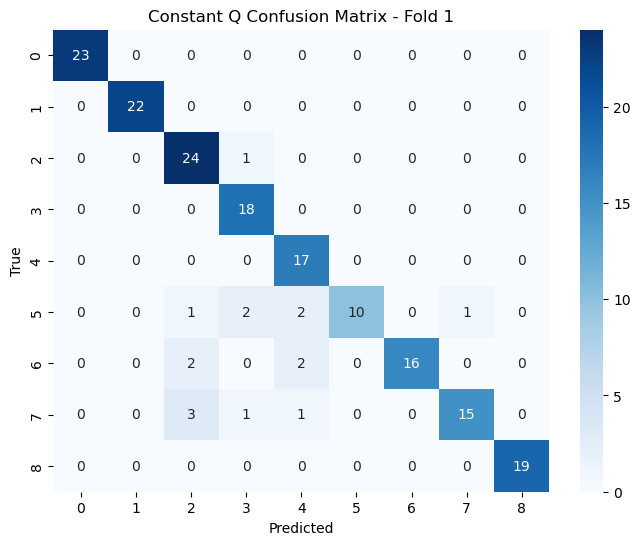

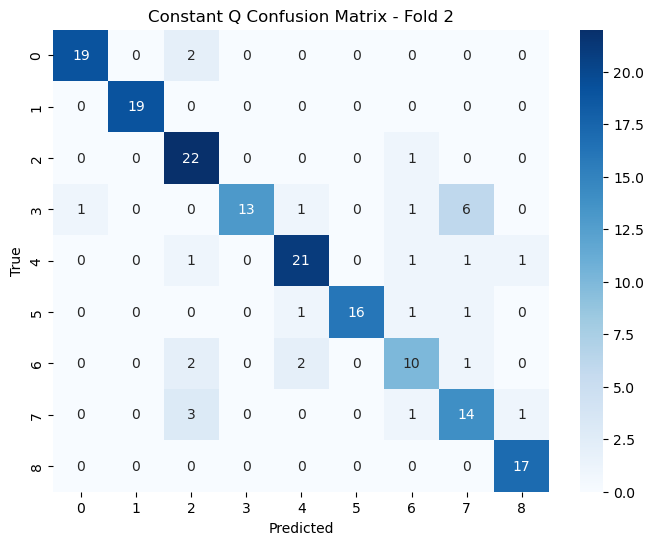

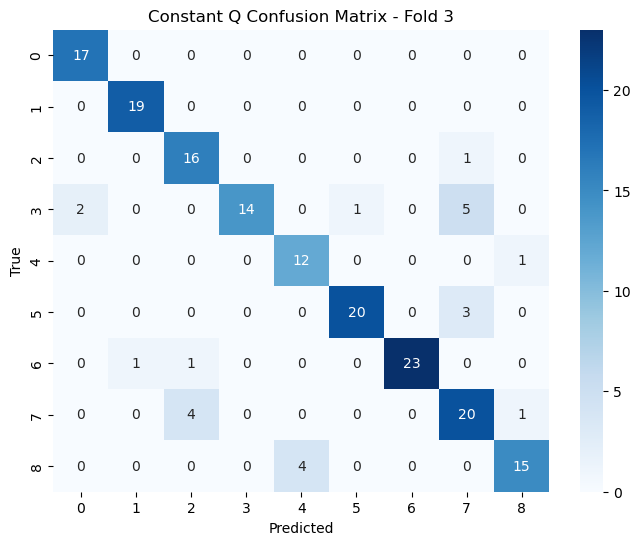

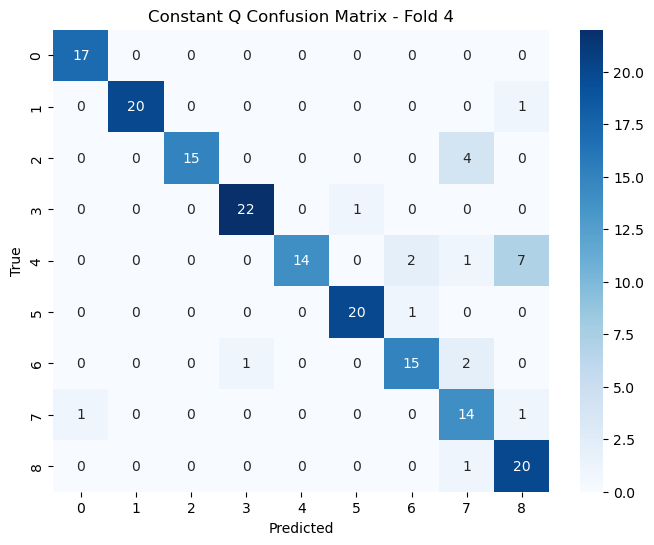

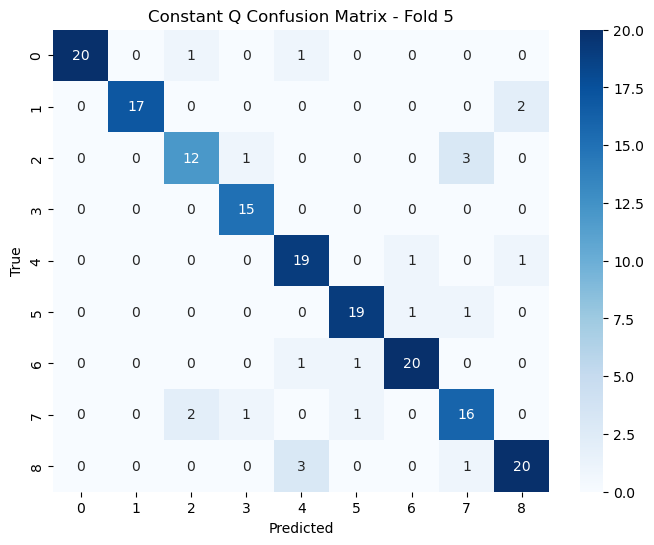


Cqt Model
Accuracies: [0.7944444417953491, 0.9166666865348816, 0.9333333373069763, 0.8999999761581421, 0.8500000238418579]
Mean: 0.8789, Std: 0.0506, Min: 0.7944, Max: 0.9333

Classification Report for Fold 1:


precision    recall  f1-score     support
0              1.000000  0.869565  0.930233   23.000000
1              0.954545  0.954545  0.954545   22.000000
2              1.000000  0.600000  0.750000   25.000000
3              0.653846  0.944444  0.772727   18.000000
4              0.833333  0.294118  0.434783   17.000000
5              0.875000  0.875000  0.875000   16.000000
6              0.633333  0.950000  0.760000   20.000000
7              1.000000  0.700000  0.823529   20.000000
8              0.580645  0.947368  0.720000   19.000000
accuracy       0.794444  0.794444  0.794444    0.794444
macro avg      0.836745  0.792782  0.780091  180.000000
weighted avg   0.847971  0.794444  0.787757  180.000000


Classification Report for Fold 2:


precision    recall  f1-score     support
0              1.000000  0.904762  0.950000   21.000000
1              1.000000  1.000000  1.000000   19.000000
2              0.884615  1.000000  0.938776   23.000000
3              0.952381  0.909091  0.930233   22.000000
4              0.913043  0.840000  0.875000   25.000000
5              0.842105  0.842105  0.842105   19.000000
6              1.000000  0.733333  0.846154   15.000000
7              0.826087  1.000000  0.904762   19.000000
8              0.894737  1.000000  0.944444   17.000000
accuracy       0.916667  0.916667  0.916667    0.916667
macro avg      0.923663  0.914366  0.914608  180.000000
weighted avg   0.922393  0.916667  0.915668  180.000000


Classification Report for Fold 3:


precision    recall  f1-score     support
0              0.944444  1.000000  0.971429   17.000000
1              1.000000  0.947368  0.972973   19.000000
2              0.888889  0.941176  0.914286   17.000000
3              1.000000  1.000000  1.000000   22.000000
4              0.764706  1.000000  0.866667   13.000000
5              0.916667  0.956522  0.936170   23.000000
6              0.958333  0.920000  0.938776   25.000000
7              1.000000  0.760000  0.863636   25.000000
8              0.900000  0.947368  0.923077   19.000000
accuracy       0.933333  0.933333  0.933333    0.933333
macro avg      0.930338  0.941382  0.931890  180.000000
weighted avg   0.940275  0.933333  0.933005  180.000000


Classification Report for Fold 4:


precision    recall  f1-score  support
0              1.000000  1.000000  1.000000     17.0
1              0.954545  1.000000  0.976744     21.0
2              0.950000  1.000000  0.974359     19.0
3              1.000000  0.652174  0.789474     23.0
4              0.920000  0.958333  0.938776     24.0
5              0.655172  0.904762  0.760000     21.0
6              0.888889  0.888889  0.888889     18.0
7              0.923077  0.750000  0.827586     16.0
8              0.952381  0.952381  0.952381     21.0
accuracy       0.900000  0.900000  0.900000      0.9
macro avg      0.916007  0.900727  0.900912    180.0
weighted avg   0.915018  0.900000  0.899524    180.0


Classification Report for Fold 5:


precision    recall  f1-score  support
0              0.888889  0.727273  0.800000    22.00
1              0.944444  0.894737  0.918919    19.00
2              1.000000  0.812500  0.896552    16.00
3              0.882353  1.000000  0.937500    15.00
4              0.782609  0.857143  0.818182    21.00
5              0.782609  0.857143  0.818182    21.00
6              0.863636  0.863636  0.863636    22.00
7              0.760000  0.950000  0.844444    20.00
8              0.857143  0.750000  0.800000    24.00
accuracy       0.850000  0.850000  0.850000     0.85
macro avg      0.862409  0.856937  0.855268   180.00
weighted avg   0.857646  0.850000  0.849552   180.00

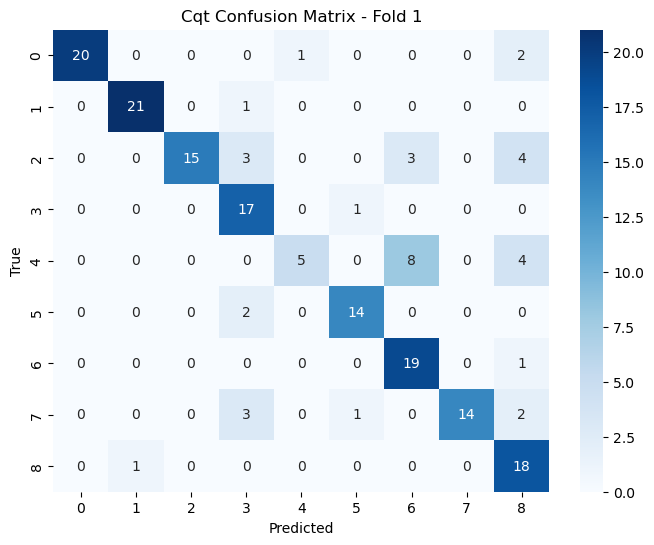

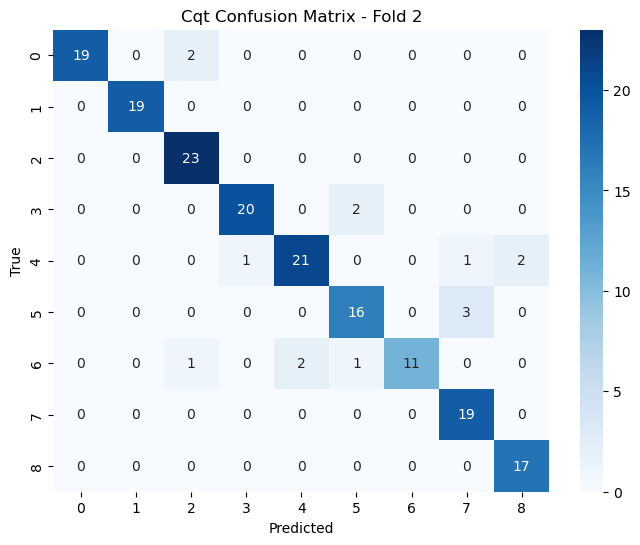

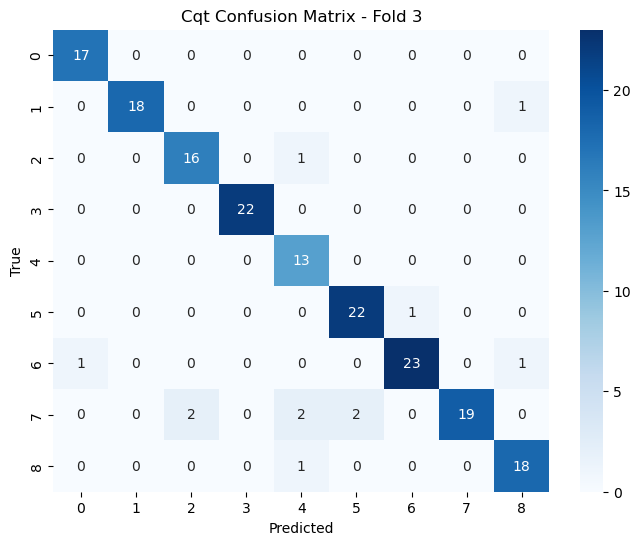

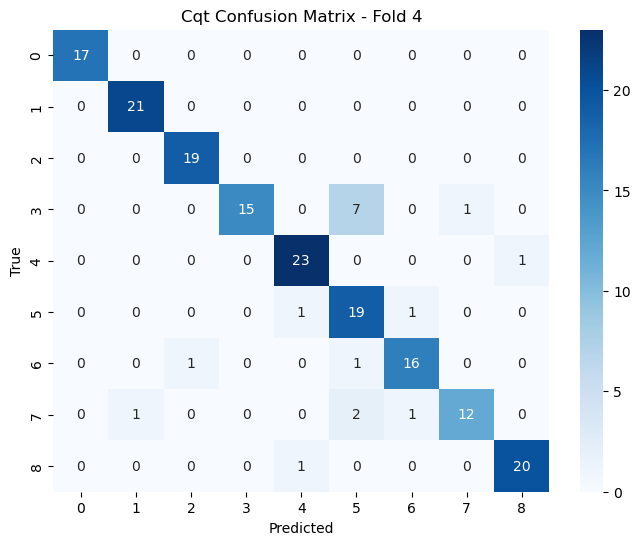

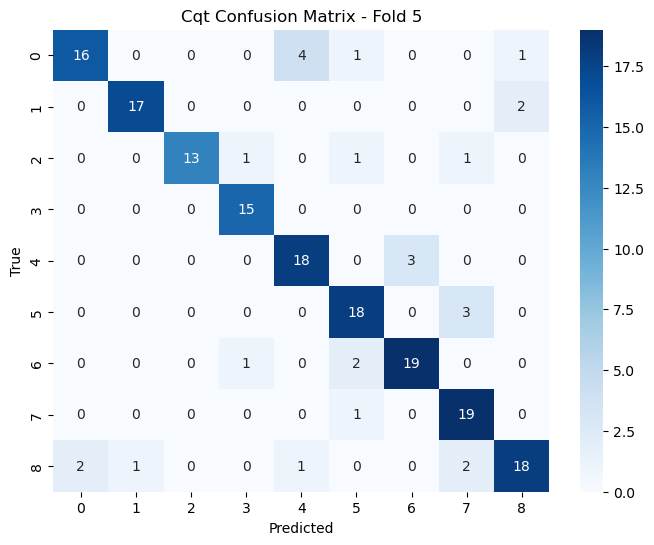


Stft Model
Accuracies: [0.800000011920929, 0.699999988079071, 0.605555534362793, 0.6499999761581421, 0.5]
Mean: 0.6511, Std: 0.0995, Min: 0.5000, Max: 0.8000

Classification Report for Fold 1:


precision    recall  f1-score  support
0              1.000000  0.869565  0.930233     23.0
1              0.956522  1.000000  0.977778     22.0
2              1.000000  0.560000  0.717949     25.0
3              0.629630  0.944444  0.755556     18.0
4              0.923077  0.705882  0.800000     17.0
5              0.611111  0.687500  0.647059     16.0
6              0.875000  0.700000  0.777778     20.0
7              0.592593  0.800000  0.680851     20.0
8              0.818182  0.947368  0.878049     19.0
accuracy       0.800000  0.800000  0.800000      0.8
macro avg      0.822902  0.801640  0.796139    180.0
weighted avg   0.837468  0.800000  0.801465    180.0


Classification Report for Fold 2:


precision    recall  f1-score  support
0              1.000000  0.761905  0.864865     21.0
1              0.894737  0.894737  0.894737     19.0
2              1.000000  0.695652  0.820513     23.0
3              0.555556  0.909091  0.689655     22.0
4              1.000000  0.320000  0.484848     25.0
5              0.684211  0.684211  0.684211     19.0
6              0.583333  0.466667  0.518519     15.0
7              0.565217  0.684211  0.619048     19.0
8              0.516129  0.941176  0.666667     17.0
accuracy       0.700000  0.700000  0.700000      0.7
macro avg      0.755465  0.706405  0.693674    180.0
weighted avg   0.774920  0.700000  0.695559    180.0


Classification Report for Fold 3:


precision    recall  f1-score     support
0              0.764706  0.764706  0.764706   17.000000
1              1.000000  0.842105  0.914286   19.000000
2              1.000000  0.058824  0.111111   17.000000
3              0.536585  1.000000  0.698413   22.000000
4              0.625000  0.769231  0.689655   13.000000
5              0.384615  0.652174  0.483871   23.000000
6              0.000000  0.000000  0.000000   25.000000
7              0.466667  0.560000  0.509091   25.000000
8              0.900000  0.947368  0.923077   19.000000
accuracy       0.605556  0.605556  0.605556    0.605556
macro avg      0.630841  0.621601  0.566023  180.000000
weighted avg   0.591904  0.605556  0.544365  180.000000


Classification Report for Fold 4:


precision    recall  f1-score  support
0              0.425000  1.000000  0.596491    17.00
1              1.000000  0.238095  0.384615    21.00
2              0.772727  0.894737  0.829268    19.00
3              0.900000  0.782609  0.837209    23.00
4              0.000000  0.000000  0.000000    24.00
5              0.475000  0.904762  0.622951    21.00
6              0.700000  0.777778  0.736842    18.00
7              0.642857  0.562500  0.600000    16.00
8              0.947368  0.857143  0.900000    21.00
accuracy       0.650000  0.650000  0.650000     0.65
macro avg      0.651439  0.668625  0.611931   180.00
weighted avg   0.646457  0.650000  0.600413   180.00


Classification Report for Fold 5:


precision    recall  f1-score  support
0              0.301370  1.000000  0.463158     22.0
1              1.000000  0.052632  0.100000     19.0
2              1.000000  0.375000  0.545455     16.0
3              0.888889  0.533333  0.666667     15.0
4              0.000000  0.000000  0.000000     21.0
5              0.727273  0.761905  0.744186     21.0
6              0.888889  0.363636  0.516129     22.0
7              0.348837  0.750000  0.476190     20.0
8              0.823529  0.583333  0.682927     24.0
accuracy       0.500000  0.500000  0.500000      0.5
macro avg      0.664310  0.491093  0.466079    180.0
weighted avg   0.647407  0.500000  0.465075    180.0

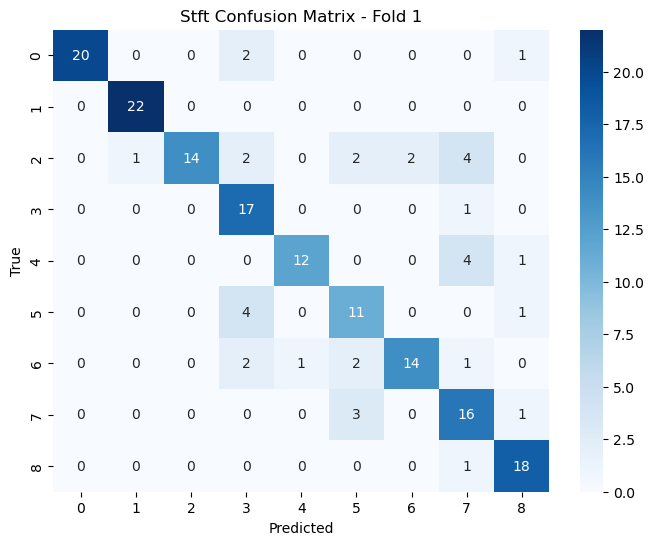

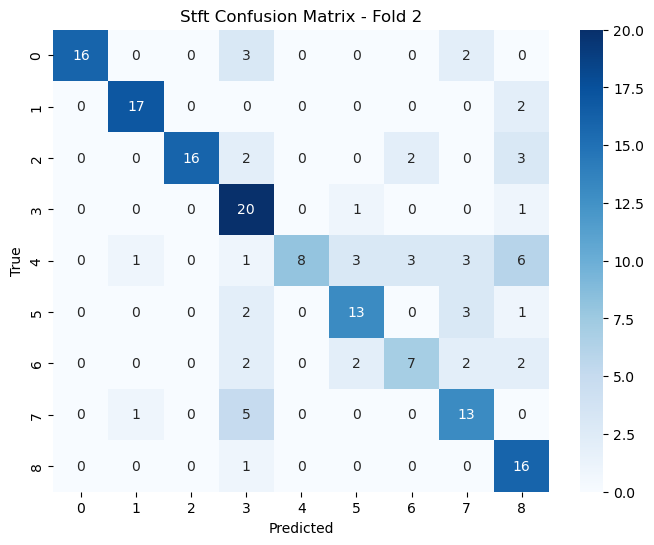

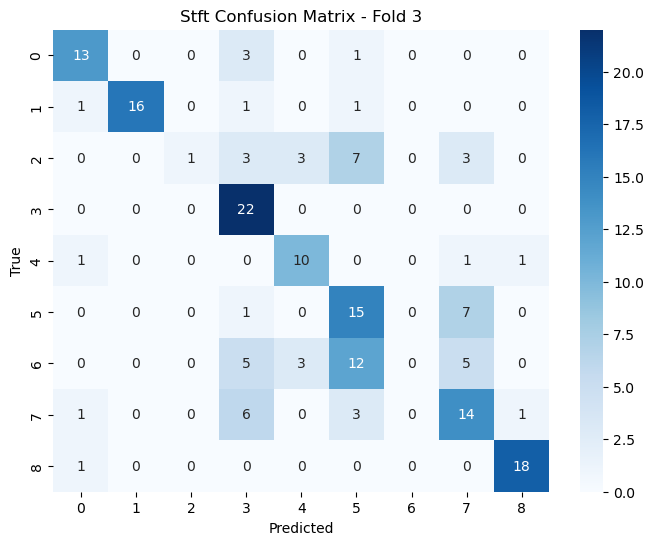

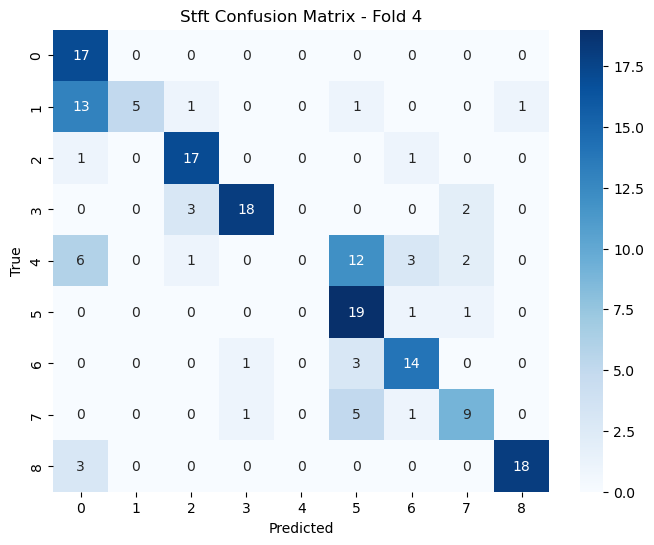

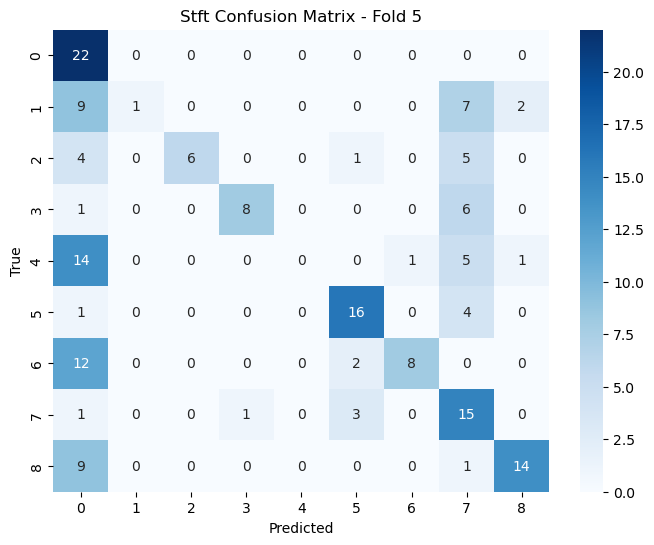


Harmonic Percussive Model
Accuracies: [0.9111111164093018, 0.9333333373069763, 0.8999999761581421, 0.9388889074325562, 0.8999999761581421]
Mean: 0.9167, Std: 0.0165, Min: 0.9000, Max: 0.9389

Classification Report for Fold 1:


precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   23.000000
1              1.000000  1.000000  1.000000   22.000000
2              0.960000  0.960000  0.960000   25.000000
3              0.944444  0.944444  0.944444   18.000000
4              1.000000  1.000000  1.000000   17.000000
5              0.846154  0.687500  0.758621   16.000000
6              1.000000  0.750000  0.857143   20.000000
7              0.640000  0.800000  0.711111   20.000000
8              0.863636  1.000000  0.926829   19.000000
accuracy       0.911111  0.911111  0.911111    0.911111
macro avg      0.917137  0.904660  0.906461  180.000000
weighted avg   0.920820  0.911111  0.911738  180.000000


Classification Report for Fold 2:


precision    recall  f1-score     support
0              0.954545  1.000000  0.976744   21.000000
1              1.000000  0.947368  0.972973   19.000000
2              1.000000  1.000000  1.000000   23.000000
3              1.000000  0.954545  0.976744   22.000000
4              1.000000  0.840000  0.913043   25.000000
5              0.944444  0.894737  0.918919   19.000000
6              0.833333  1.000000  0.909091   15.000000
7              0.882353  0.789474  0.833333   19.000000
8              0.772727  1.000000  0.871795   17.000000
accuracy       0.933333  0.933333  0.933333    0.933333
macro avg      0.931934  0.936236  0.930294  180.000000
weighted avg   0.941061  0.933333  0.933679  180.000000


Classification Report for Fold 3:


precision    recall  f1-score  support
0              1.000000  1.000000  1.000000     17.0
1              1.000000  0.842105  0.914286     19.0
2              0.772727  1.000000  0.871795     17.0
3              0.909091  0.909091  0.909091     22.0
4              1.000000  0.846154  0.916667     13.0
5              0.863636  0.826087  0.844444     23.0
6              0.920000  0.920000  0.920000     25.0
7              0.869565  0.800000  0.833333     25.0
8              0.863636  1.000000  0.926829     19.0
accuracy       0.900000  0.900000  0.900000      0.9
macro avg      0.910962  0.904826  0.904049    180.0
weighted avg   0.906379  0.900000  0.899855    180.0


Classification Report for Fold 4:


precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   17.000000
1              1.000000  1.000000  1.000000   21.000000
2              0.950000  1.000000  0.974359   19.000000
3              0.956522  0.956522  0.956522   23.000000
4              0.960000  1.000000  0.979592   24.000000
5              0.947368  0.857143  0.900000   21.000000
6              0.782609  1.000000  0.878049   18.000000
7              1.000000  0.562500  0.720000   16.000000
8              0.913043  1.000000  0.954545   21.000000
accuracy       0.938889  0.938889  0.938889    0.938889
macro avg      0.945505  0.930685  0.929230  180.000000
weighted avg   0.945809  0.938889  0.934963  180.000000


Classification Report for Fold 5:


precision    recall  f1-score  support
0              0.814815  1.000000  0.897959     22.0
1              0.950000  1.000000  0.974359     19.0
2              0.761905  1.000000  0.864865     16.0
3              1.000000  1.000000  1.000000     15.0
4              1.000000  0.904762  0.950000     21.0
5              1.000000  0.666667  0.800000     21.0
6              0.913043  0.954545  0.933333     22.0
7              0.875000  0.700000  0.777778     20.0
8              0.880000  0.916667  0.897959     24.0
accuracy       0.900000  0.900000  0.900000      0.9
macro avg      0.910529  0.904738  0.899584    180.0
weighted avg   0.910408  0.900000  0.897198    180.0

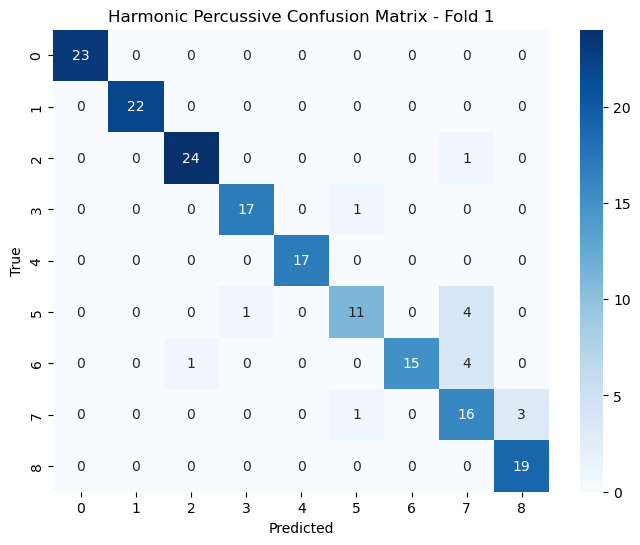

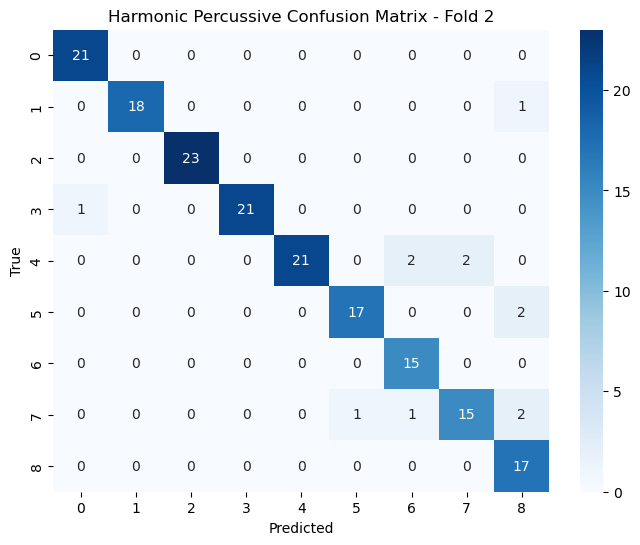

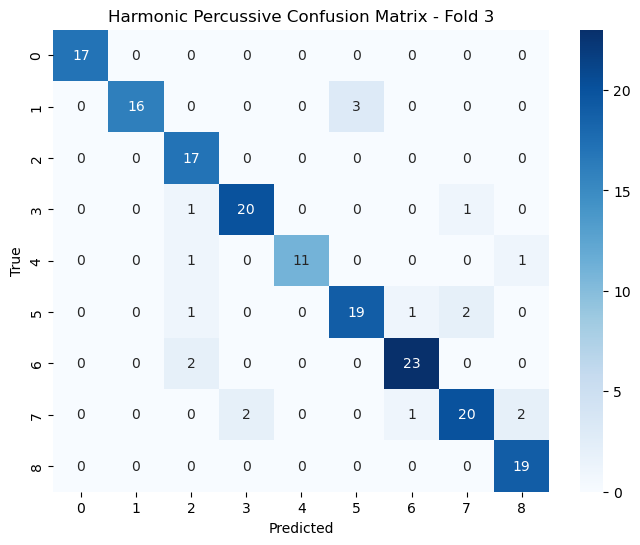

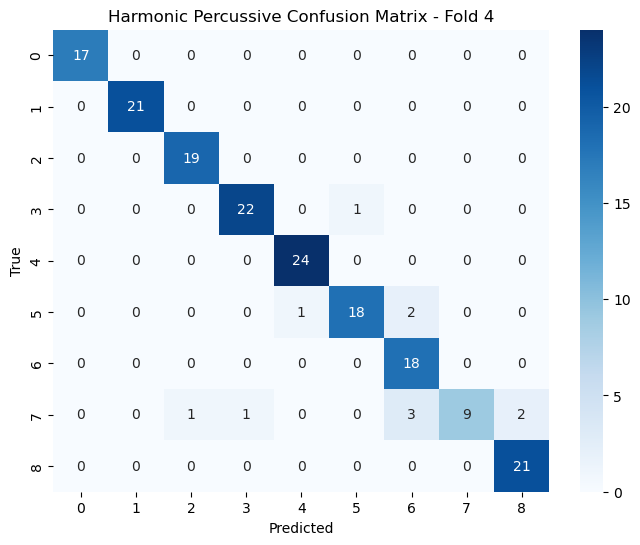

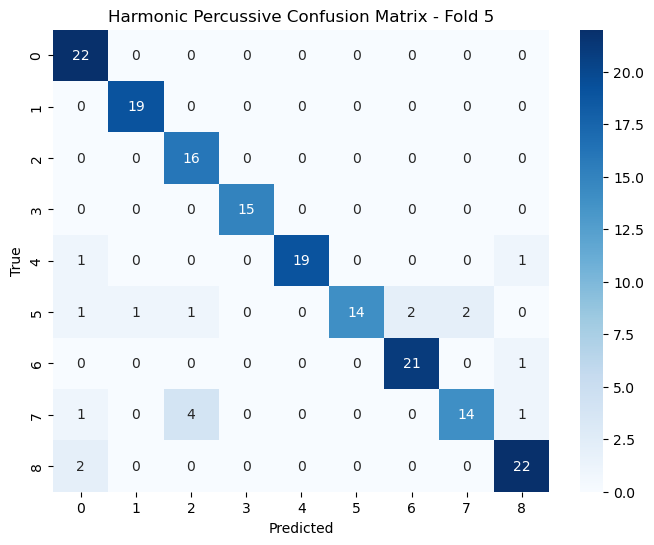


Onset Strength Model
Accuracies: [0.25, 0.24444444477558136, 0.17222222685813904, 0.21666666865348816, 0.18888889253139496]
Mean: 0.2144, Std: 0.0303, Min: 0.1722, Max: 0.2500

Classification Report for Fold 1:


precision    recall  f1-score  support
0              1.000000  0.086957  0.160000    23.00
1              0.923077  0.545455  0.685714    22.00
2              0.444444  0.160000  0.235294    25.00
3              0.096774  0.166667  0.122449    18.00
4              0.277778  0.294118  0.285714    17.00
5              0.500000  0.250000  0.333333    16.00
6              0.157895  0.450000  0.233766    20.00
7              0.066667  0.100000  0.080000    20.00
8              0.333333  0.210526  0.258065    19.00
accuracy       0.250000  0.250000  0.250000     0.25
macro avg      0.422219  0.251525  0.266037   180.00
weighted avg   0.442820  0.250000  0.267895   180.00


Classification Report for Fold 2:


precision    recall  f1-score     support
0              1.000000  0.095238  0.173913   21.000000
1              1.000000  0.315789  0.480000   19.000000
2              0.250000  0.086957  0.129032   23.000000
3              0.111111  0.090909  0.100000   22.000000
4              0.190476  0.160000  0.173913   25.000000
5              0.400000  0.315789  0.352941   19.000000
6              0.192308  0.333333  0.243902   15.000000
7              0.189189  0.736842  0.301075   19.000000
8              0.300000  0.176471  0.222222   17.000000
accuracy       0.244444  0.244444  0.244444    0.244444
macro avg      0.403676  0.256814  0.241889  180.000000
weighted avg   0.400753  0.244444  0.234169  180.000000


Classification Report for Fold 3:


precision    recall  f1-score     support
0              0.000000  0.000000  0.000000   17.000000
1              1.000000  0.052632  0.100000   19.000000
2              0.123288  0.529412  0.200000   17.000000
3              0.179487  0.318182  0.229508   22.000000
4              0.250000  0.076923  0.117647   13.000000
5              0.000000  0.000000  0.000000   23.000000
6              0.173913  0.160000  0.166667   25.000000
7              0.236842  0.360000  0.285714   25.000000
8              0.000000  0.000000  0.000000   19.000000
accuracy       0.172222  0.172222  0.172222    0.172222
macro avg      0.218170  0.166350  0.122171  180.000000
weighted avg   0.214242  0.172222  0.128823  180.000000


Classification Report for Fold 4:


precision    recall  f1-score     support
0              0.666667  0.117647  0.200000   17.000000
1              1.000000  0.047619  0.090909   21.000000
2              0.272727  0.157895  0.200000   19.000000
3              0.200000  0.043478  0.071429   23.000000
4              0.357143  0.208333  0.263158   24.000000
5              0.230769  0.142857  0.176471   21.000000
6              0.141509  0.833333  0.241935   18.000000
7              0.181818  0.125000  0.148148   16.000000
8              0.437500  0.333333  0.378378   21.000000
accuracy       0.216667  0.216667  0.216667    0.216667
macro avg      0.387570  0.223277  0.196714  180.000000
weighted avg   0.389869  0.216667  0.196915  180.000000


Classification Report for Fold 5:


precision    recall  f1-score     support
0              0.600000  0.136364  0.222222   22.000000
1              1.000000  0.105263  0.190476   19.000000
2              0.120000  0.187500  0.146341   16.000000
3              0.184211  0.466667  0.264151   15.000000
4              0.259259  0.333333  0.291667   21.000000
5              0.117647  0.095238  0.105263   21.000000
6              0.185185  0.227273  0.204082   22.000000
7              0.121212  0.200000  0.150943   20.000000
8              0.166667  0.041667  0.066667   24.000000
accuracy       0.188889  0.188889  0.188889    0.188889
macro avg      0.306020  0.199256  0.182424  180.000000
weighted avg   0.307203  0.188889  0.179199  180.000000

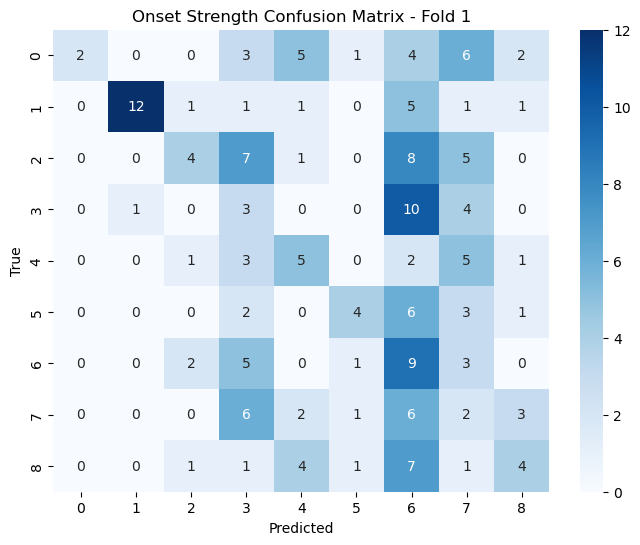

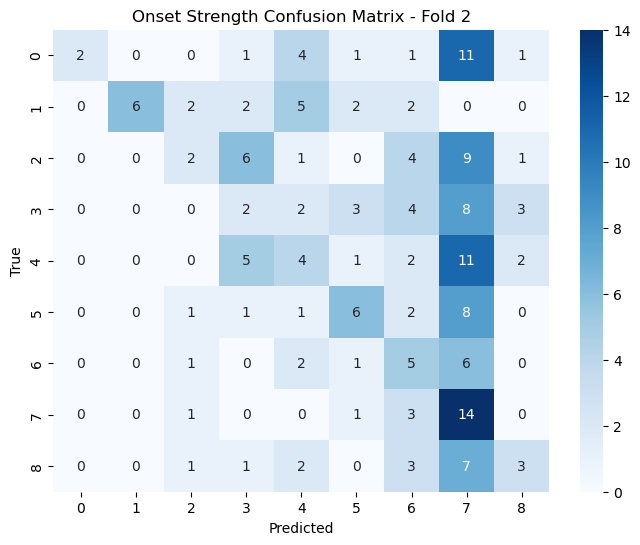

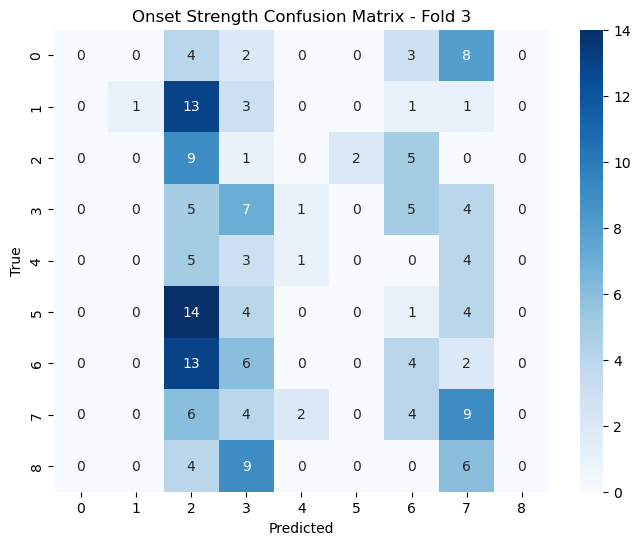

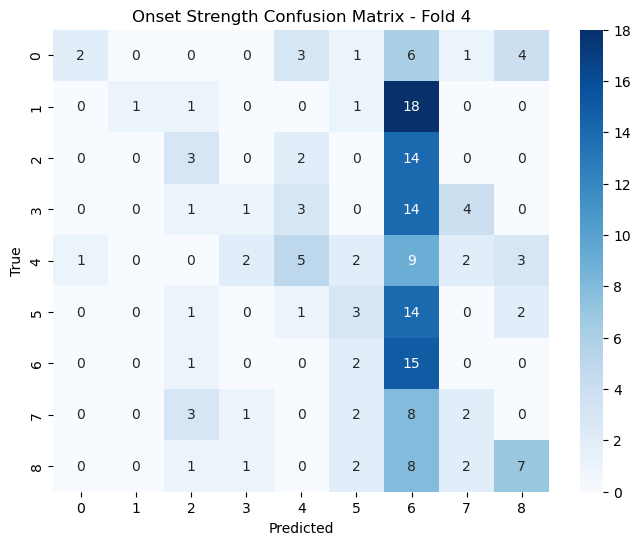

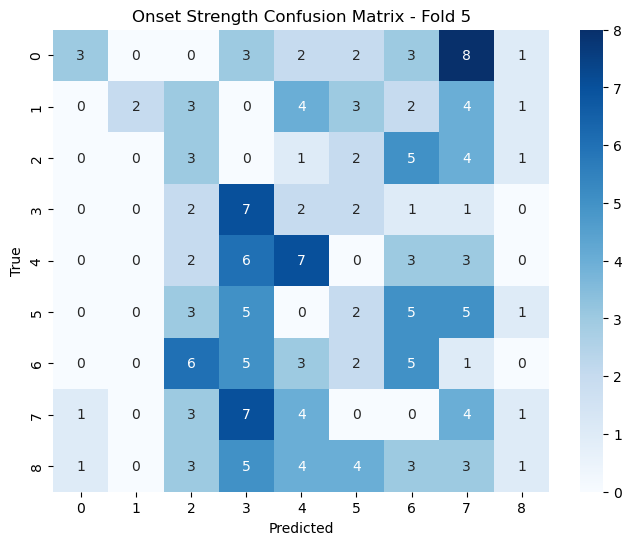

In [8]:
# Show detailed results for each feature type
for feature_type, results in individual_results.items():
    print(f"\n{'='*40}")
    print(f"{feature_type.replace('_', ' ').title()} Model")
    print(f"{'='*40}")
    accs = results['accuracy_list']
    print(f"Accuracies: {accs}")
    print(f"Mean: {np.mean(accs):.4f}, Std: {np.std(accs):.4f}, Min: {np.min(accs):.4f}, Max: {np.max(accs):.4f}")

    # Classification reports
    for i, report in enumerate(results['classification_reports']):
        print(f"\nClassification Report for Fold {i+1}:")
        display(pd.DataFrame(report).transpose())

    # Confusion matrices
    for i, conf_matrix in enumerate(results['confusion_matrices']):
        plt.figure(figsize=(8, 6))
        sns.heatmap(np.array(conf_matrix), annot=True, fmt="d", cmap="Blues")
        plt.title(f"{feature_type.replace('_', ' ').title()} Confusion Matrix - Fold {i+1}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

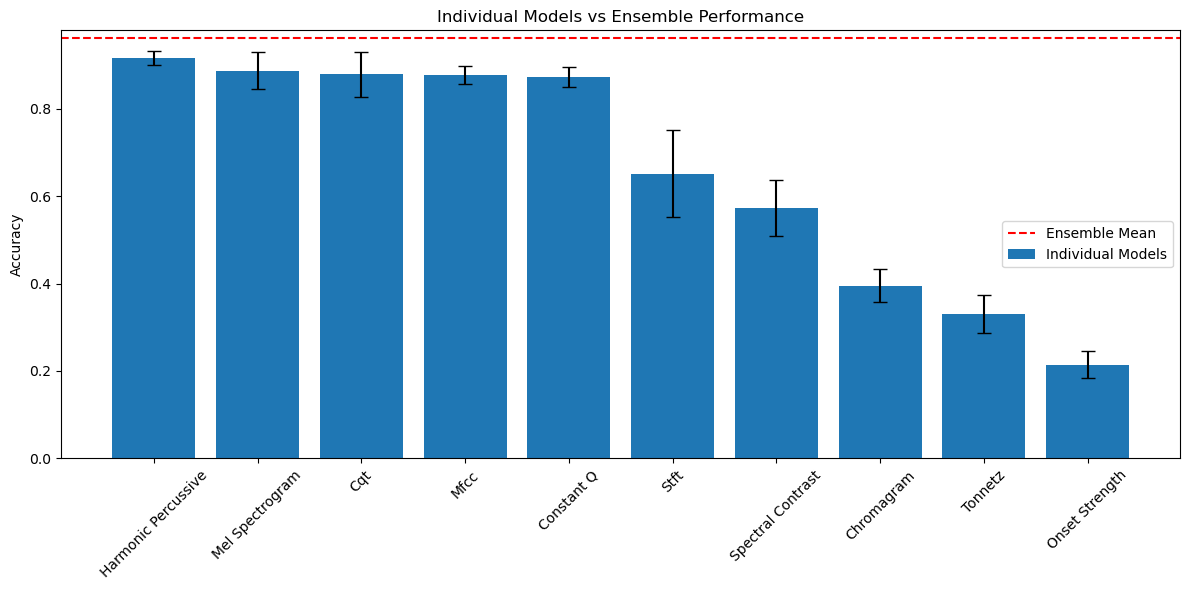

In [9]:
# Visual comparison of individual vs ensemble performance
plt.figure(figsize=(12, 6))
plt.bar(performance_df['Feature Type'], performance_df['Mean Accuracy'], yerr=performance_df['Std Accuracy'], capsize=5, label='Individual Models')
plt.axhline(np.mean(ensemble_results['accuracy_list']), color='red', linestyle='--', label='Ensemble Mean')
plt.ylabel('Accuracy')
plt.title('Individual Models vs Ensemble Performance')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Mel Spectrogram Training History


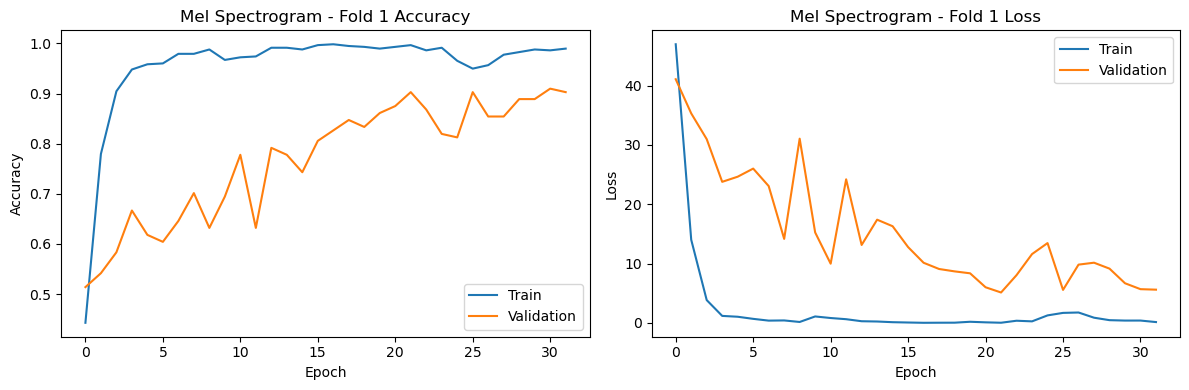

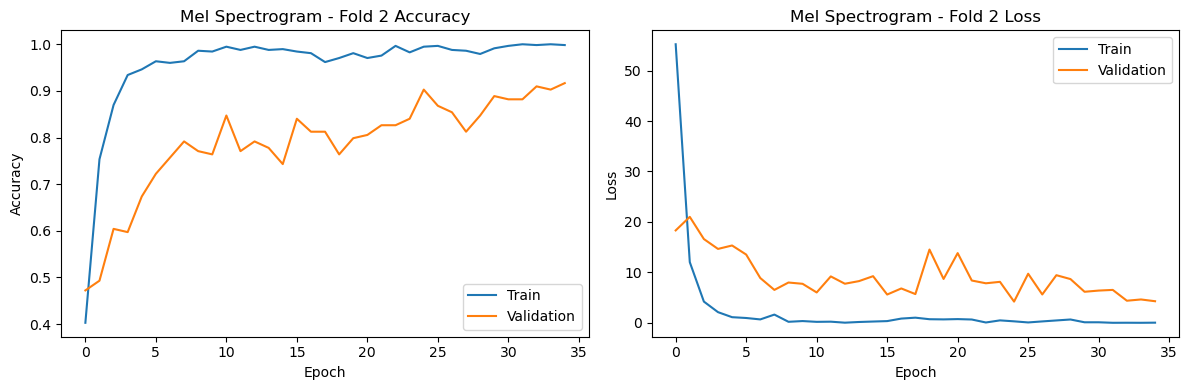

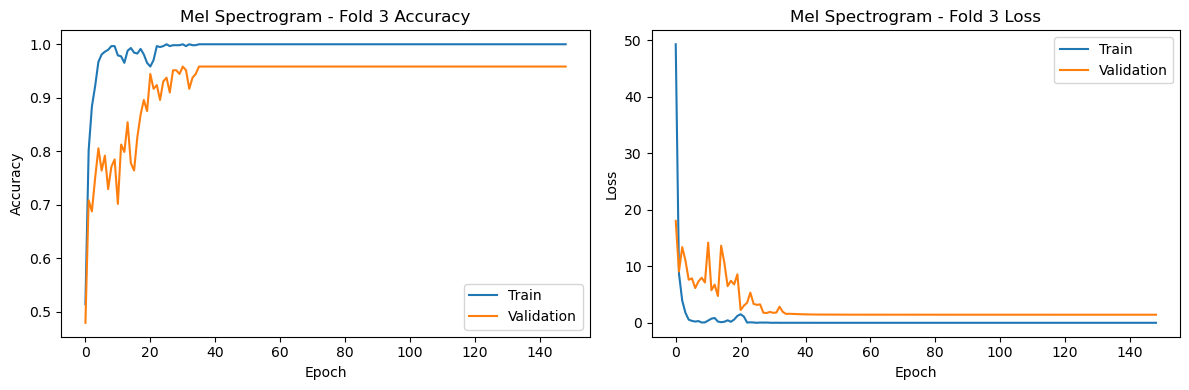

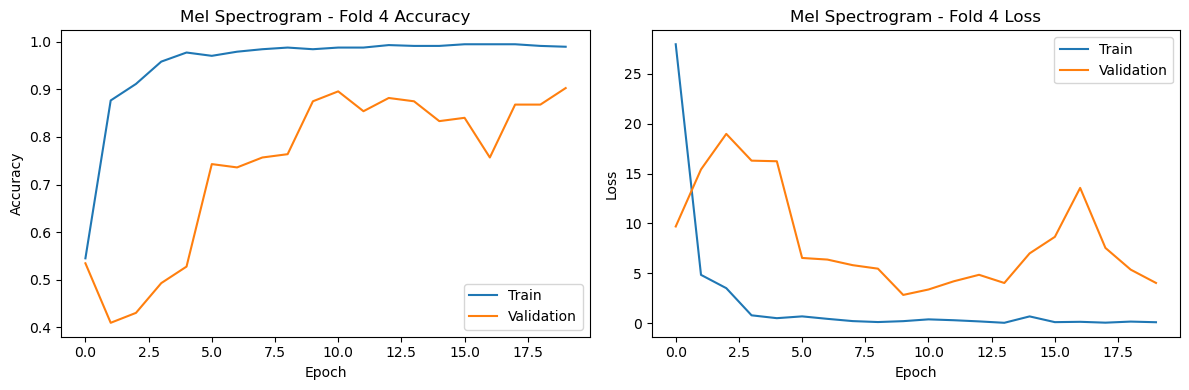

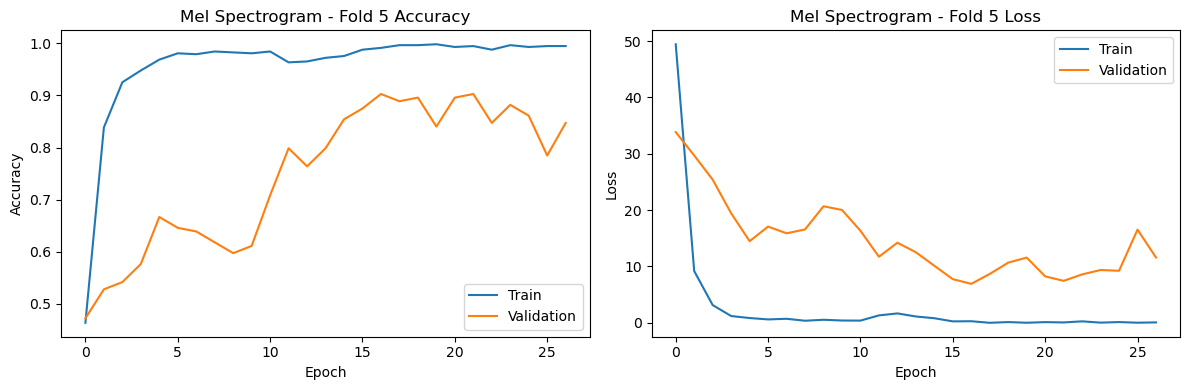


Mfcc Training History


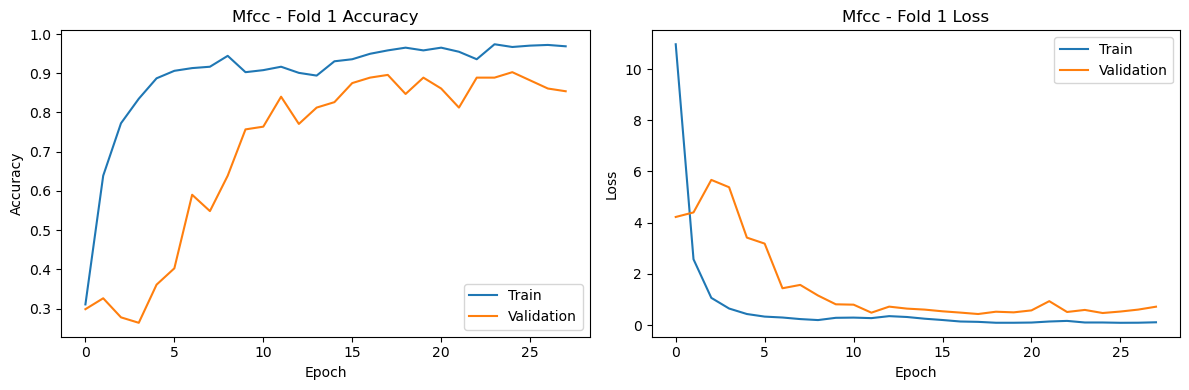

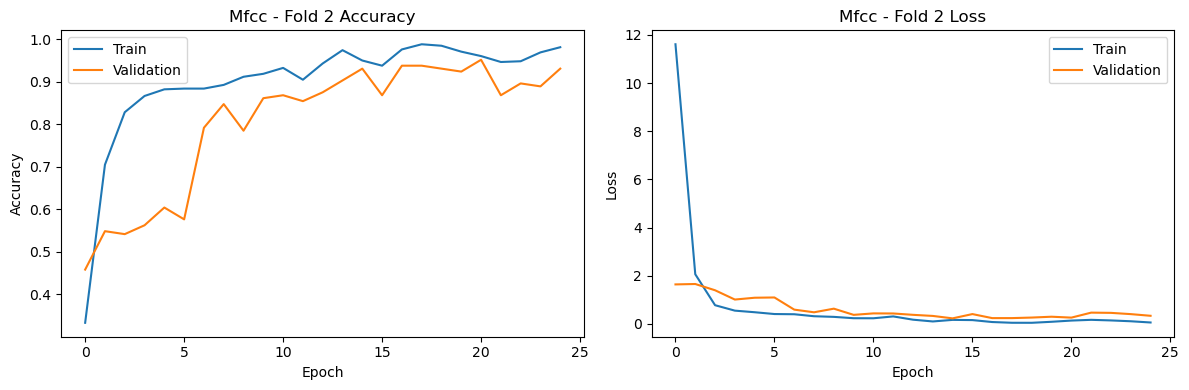

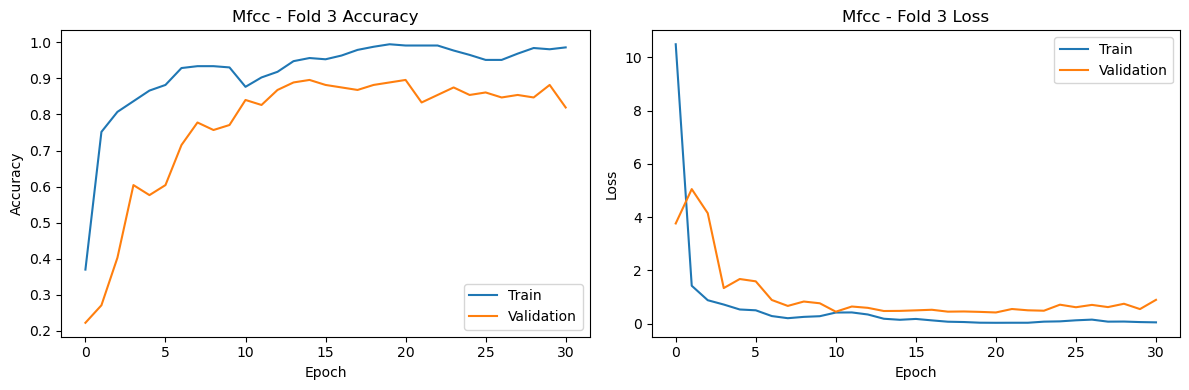

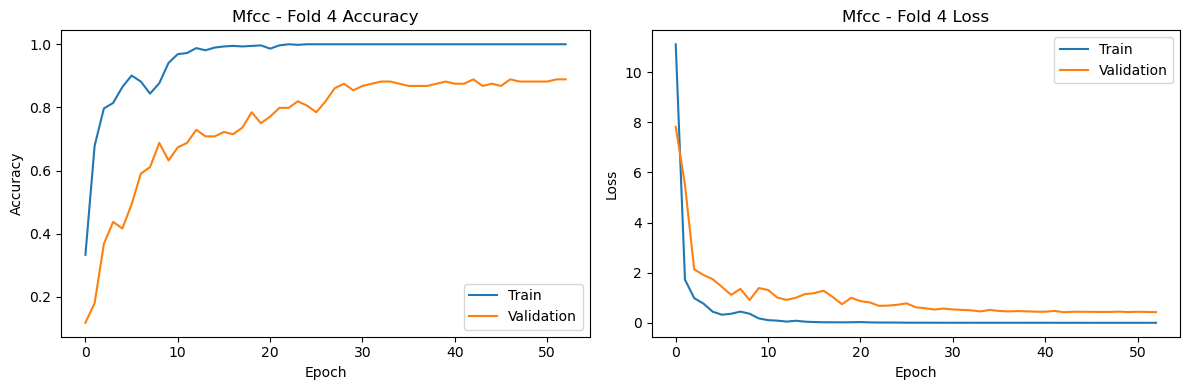

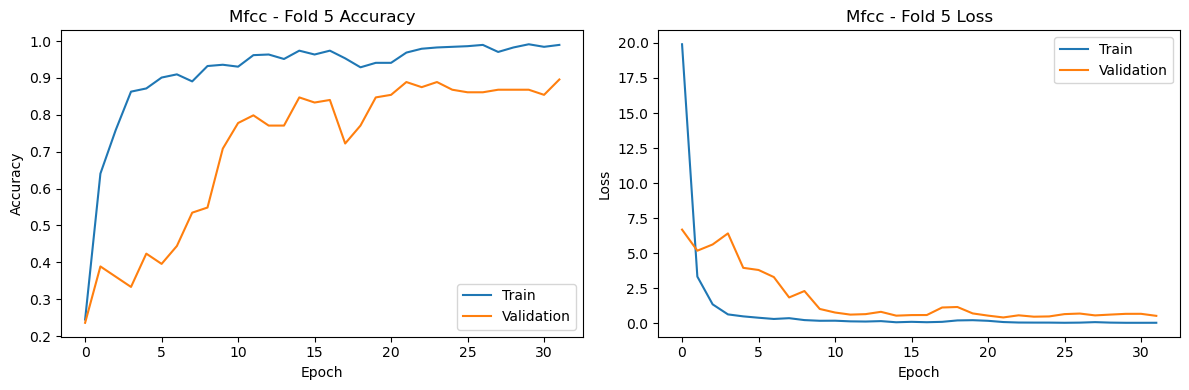


Chromagram Training History


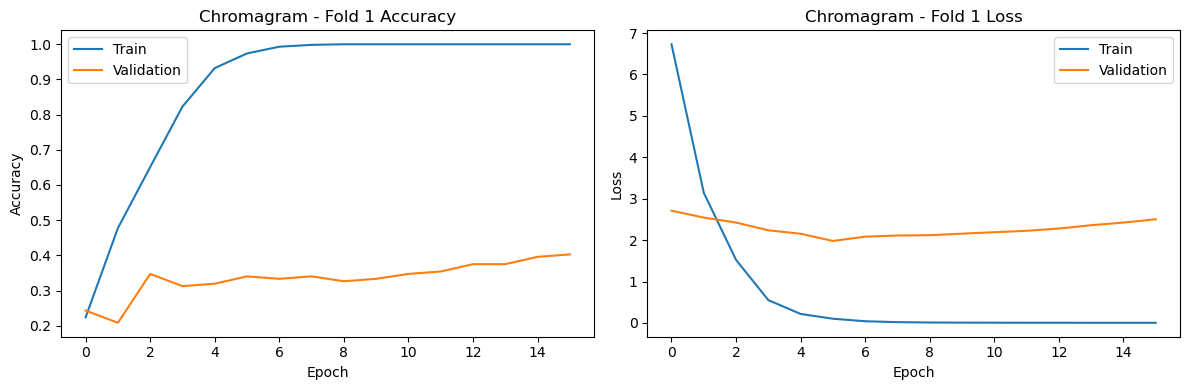

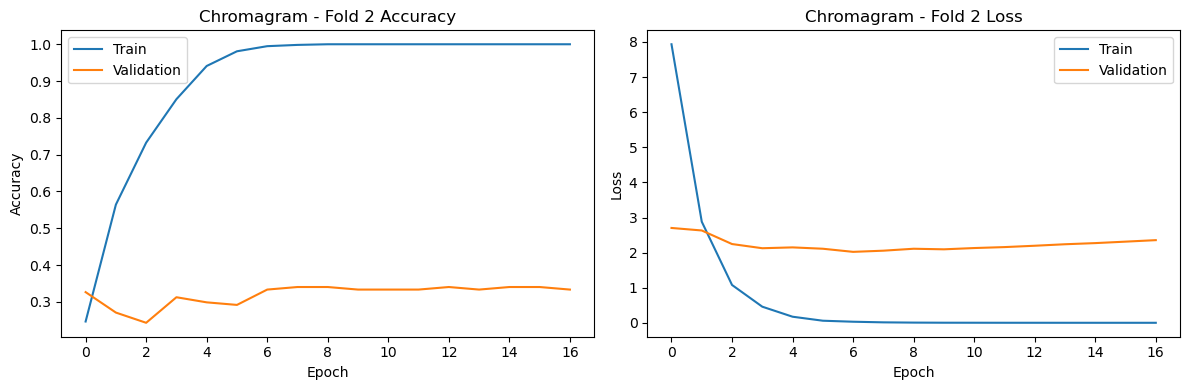

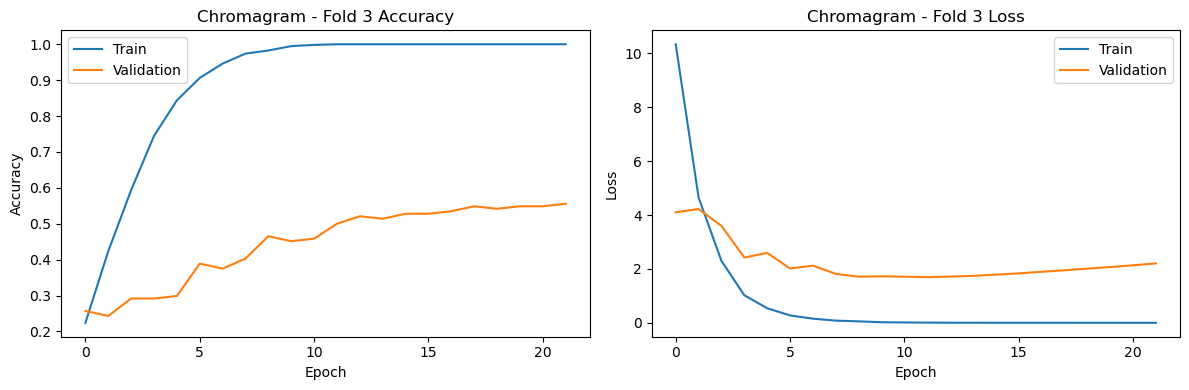

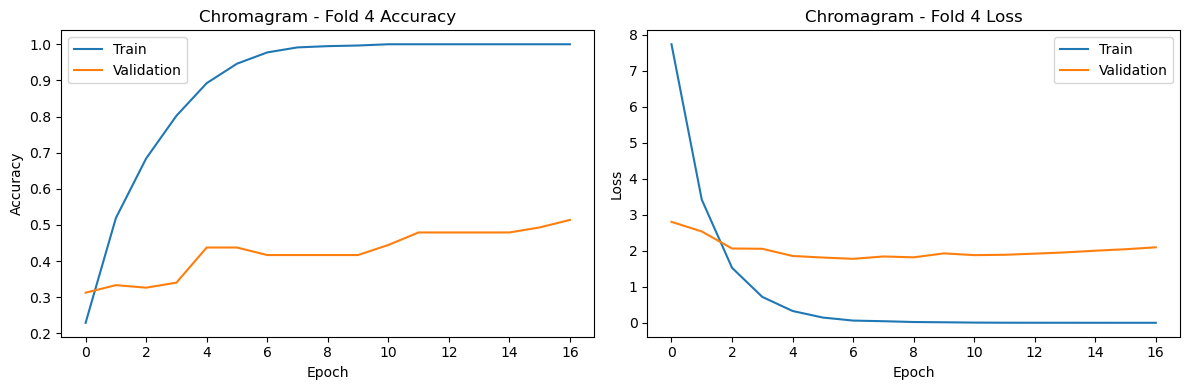

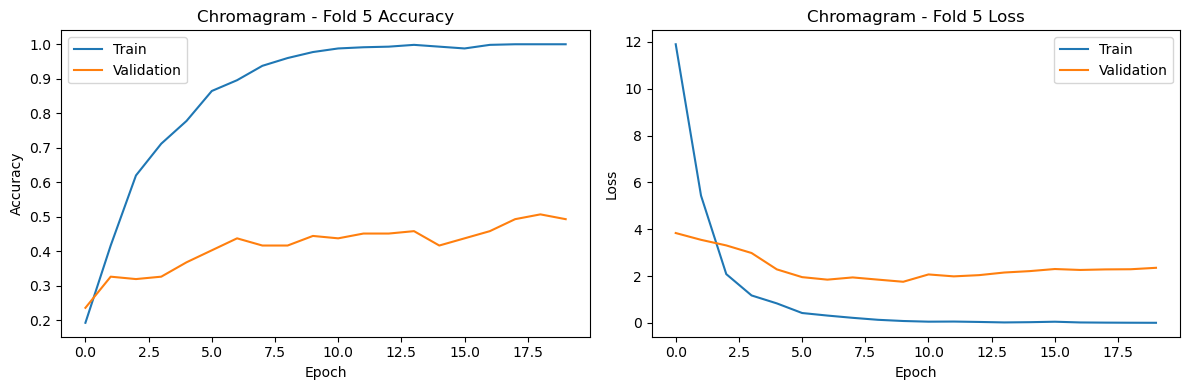


Spectral Contrast Training History


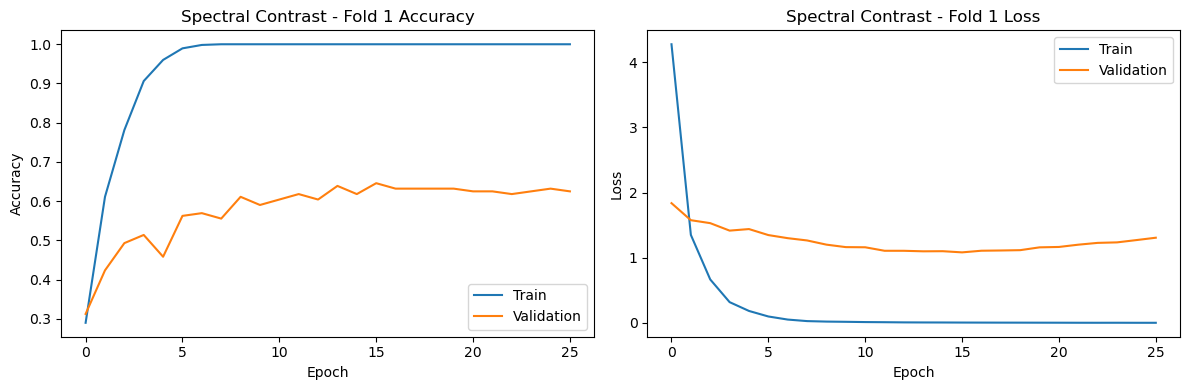

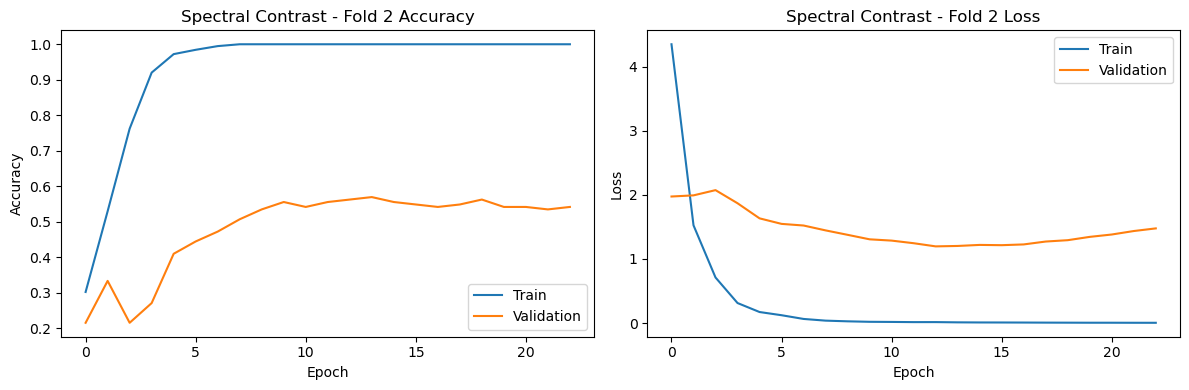

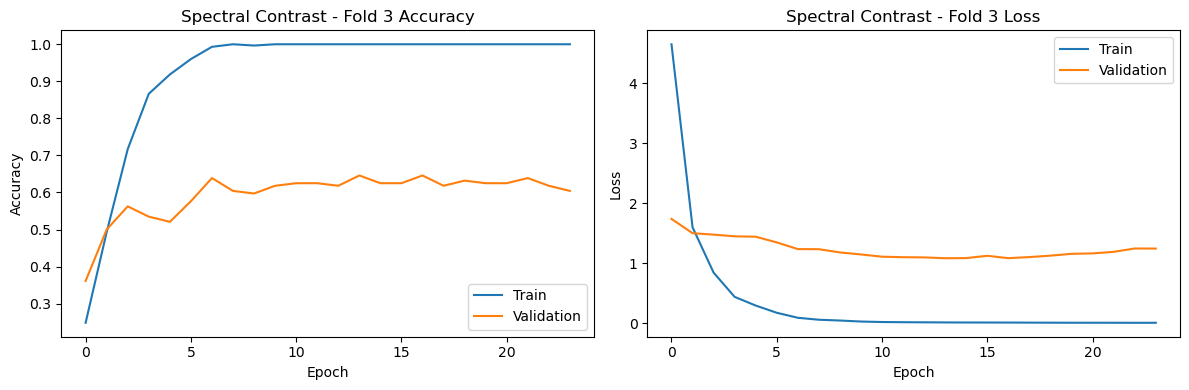

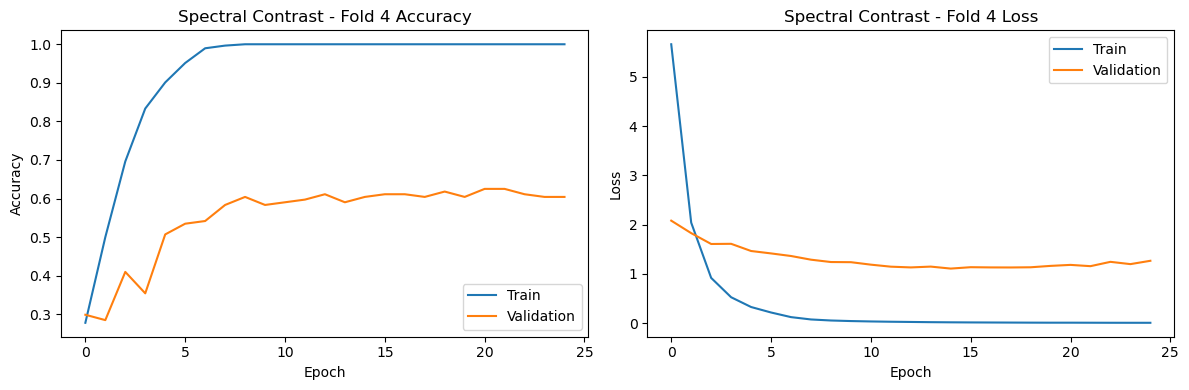

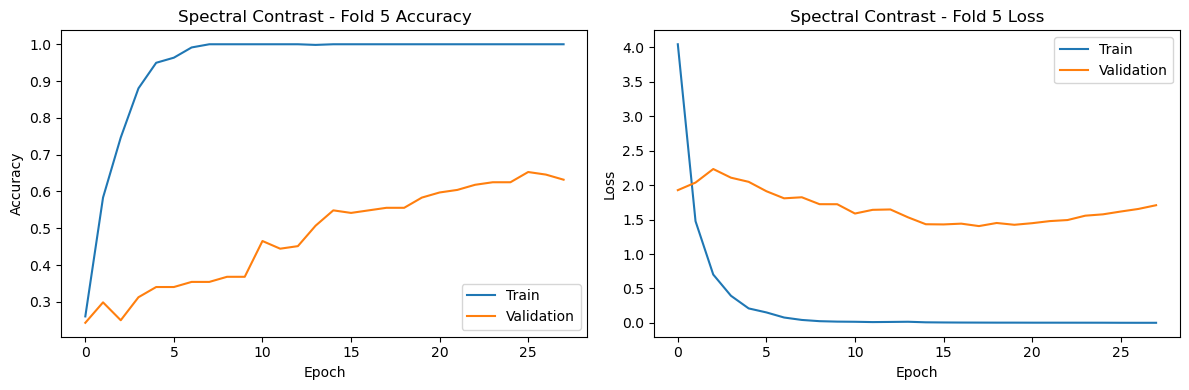


Tonnetz Training History


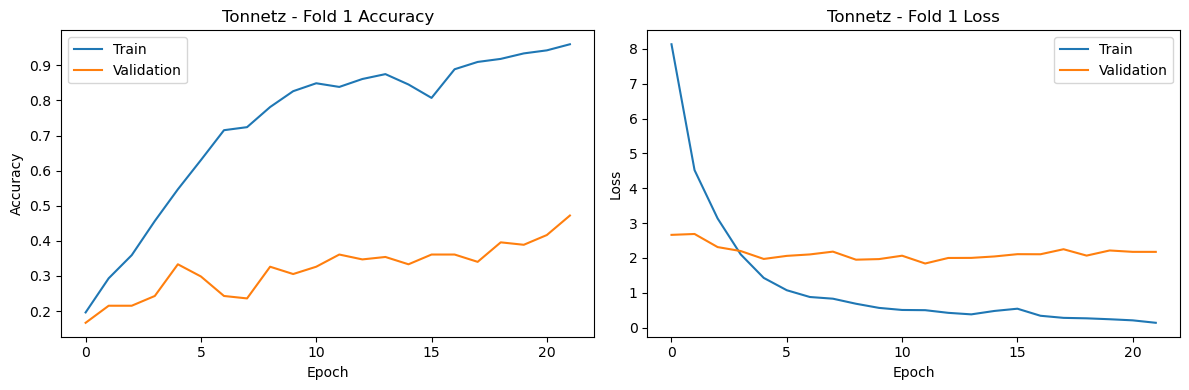

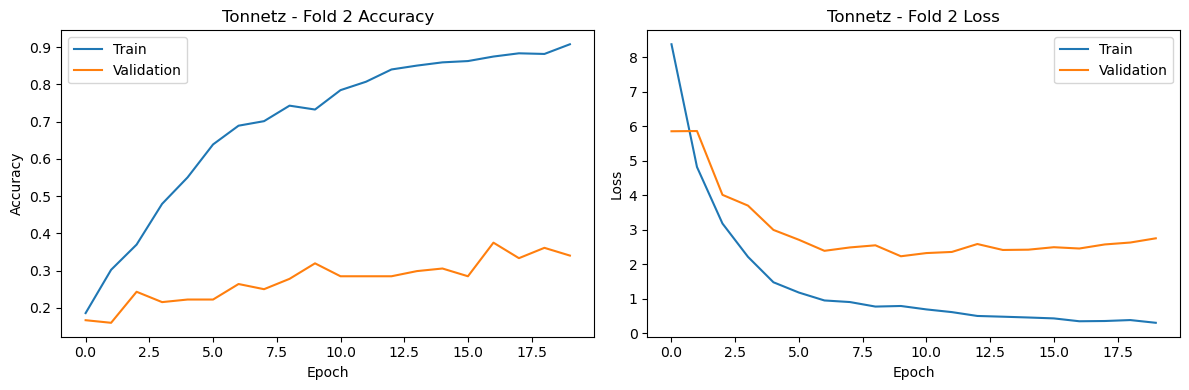

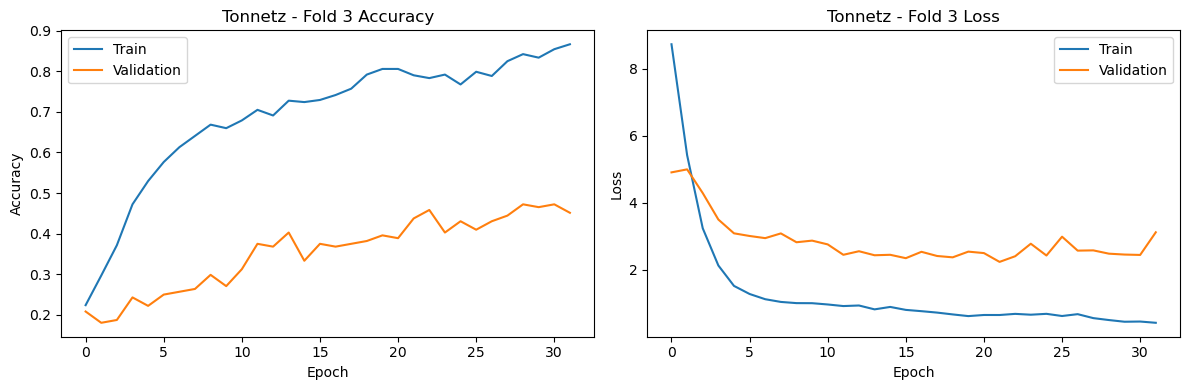

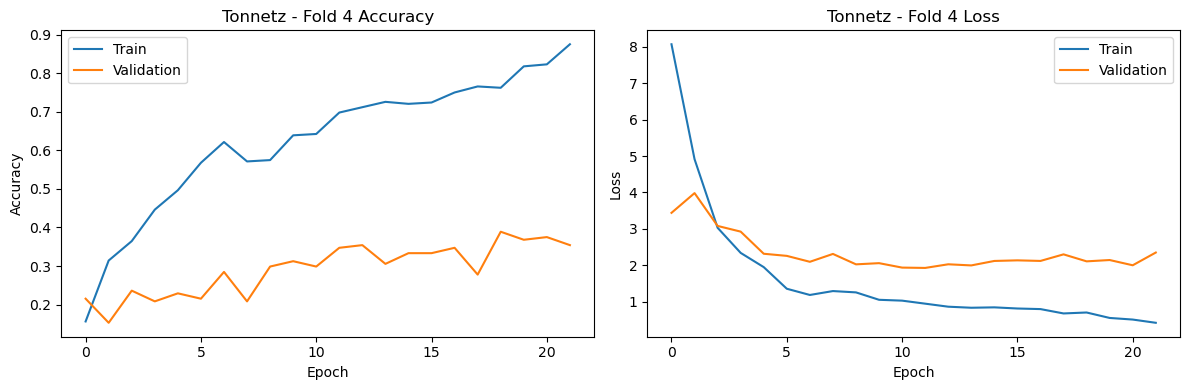

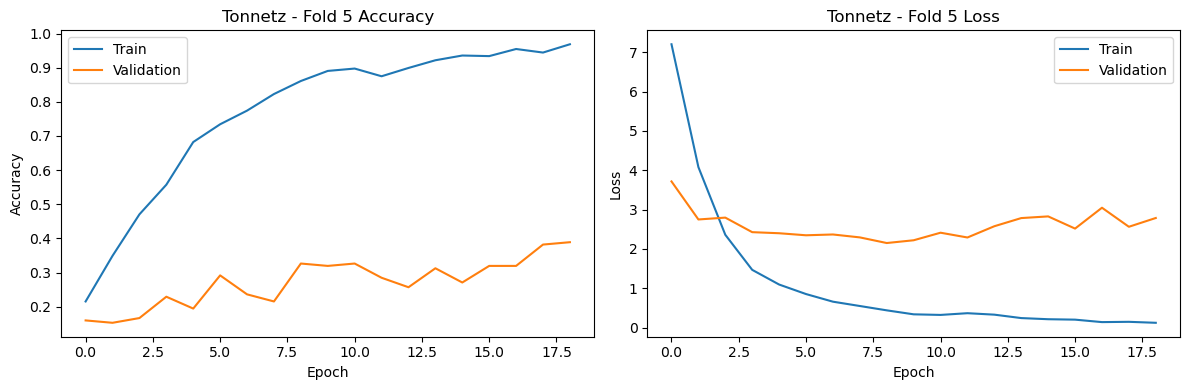


Constant Q Training History


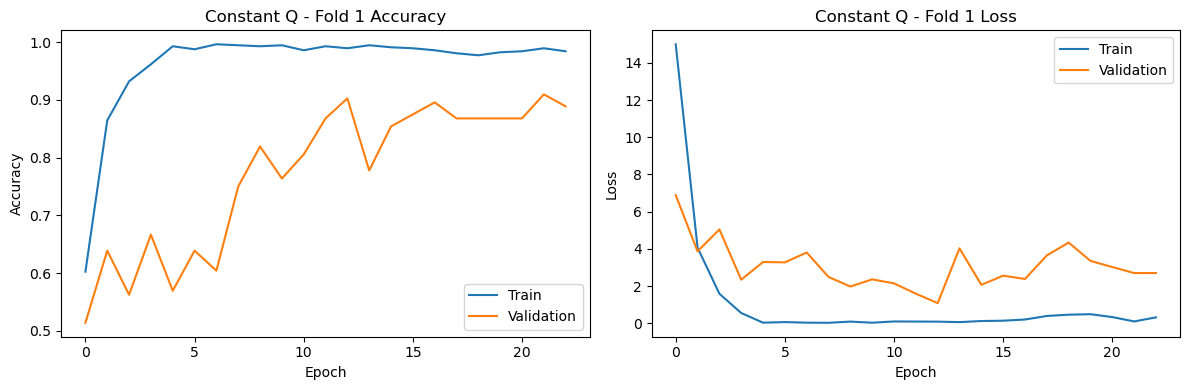

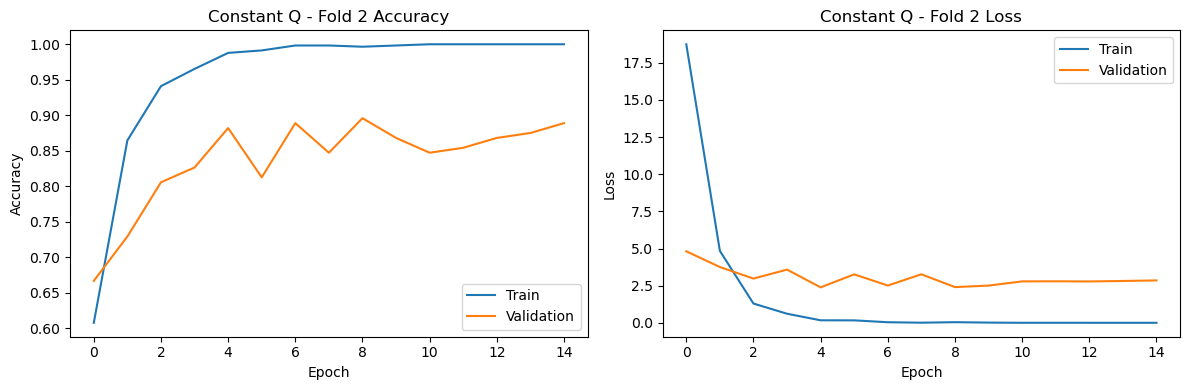

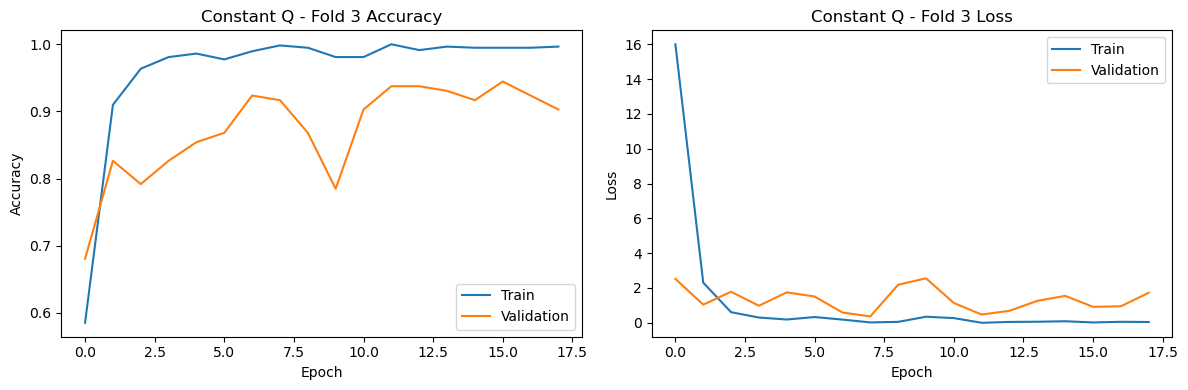

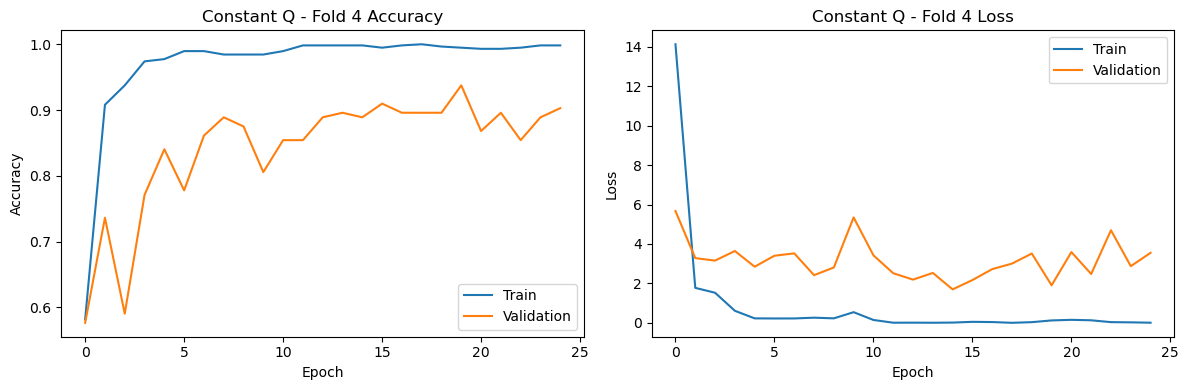

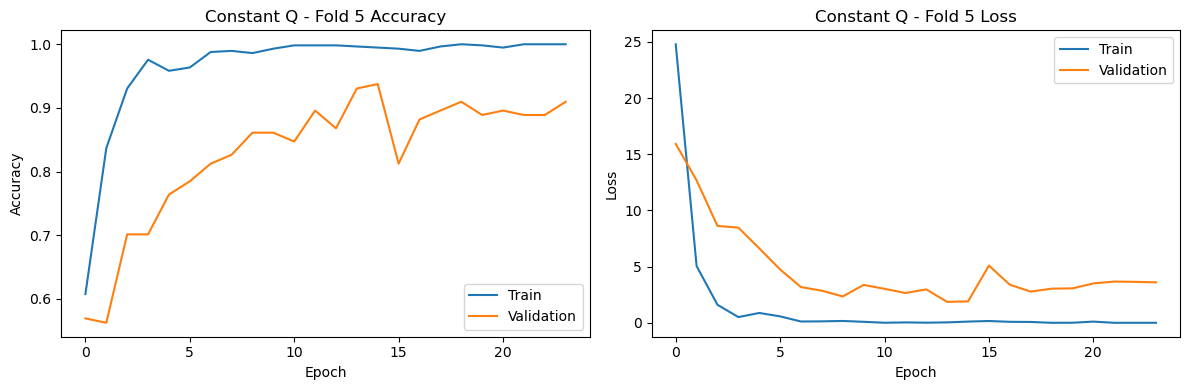


Cqt Training History


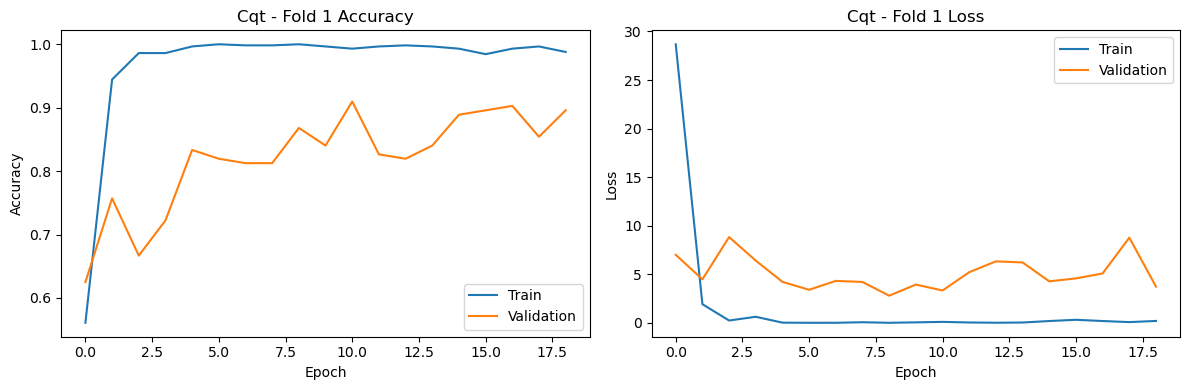

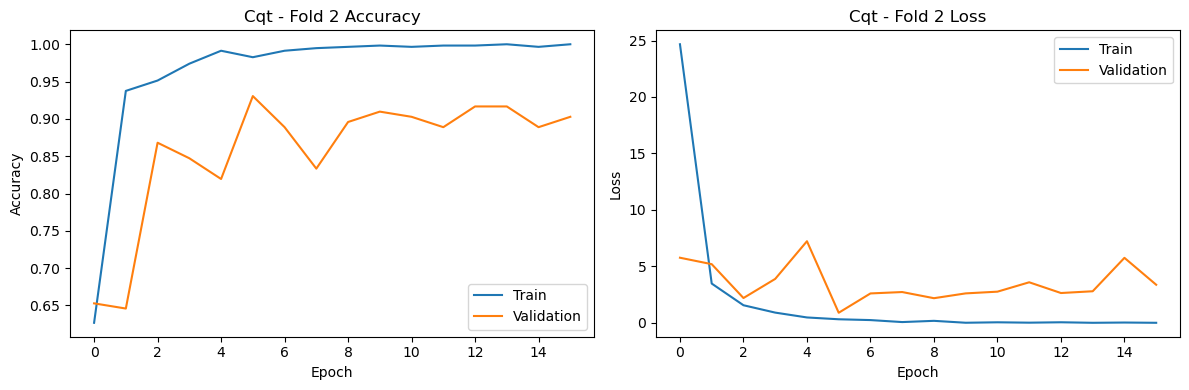

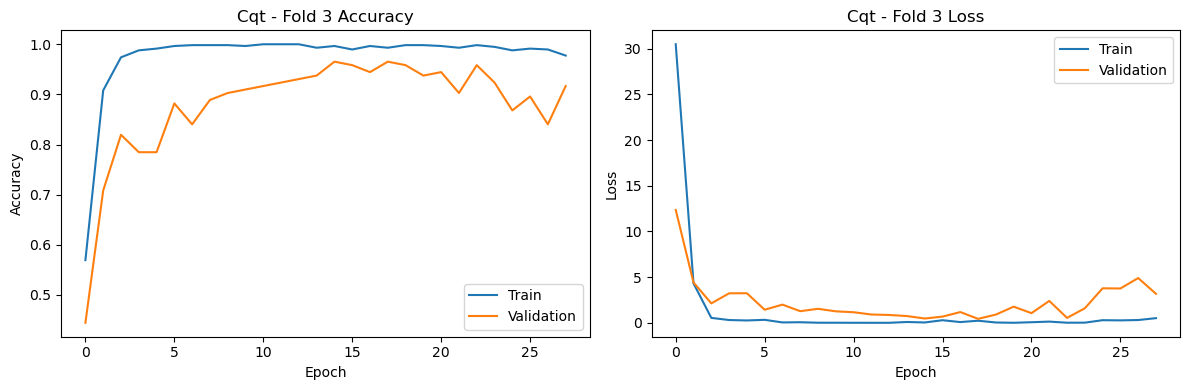

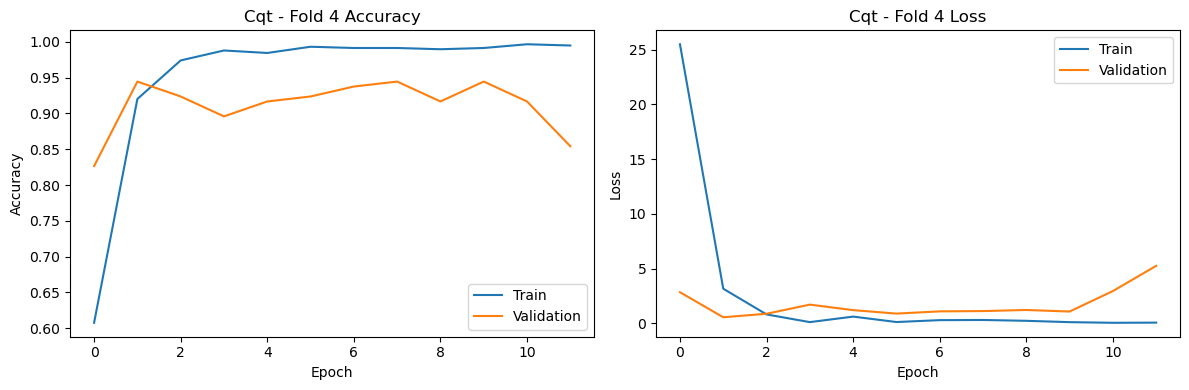

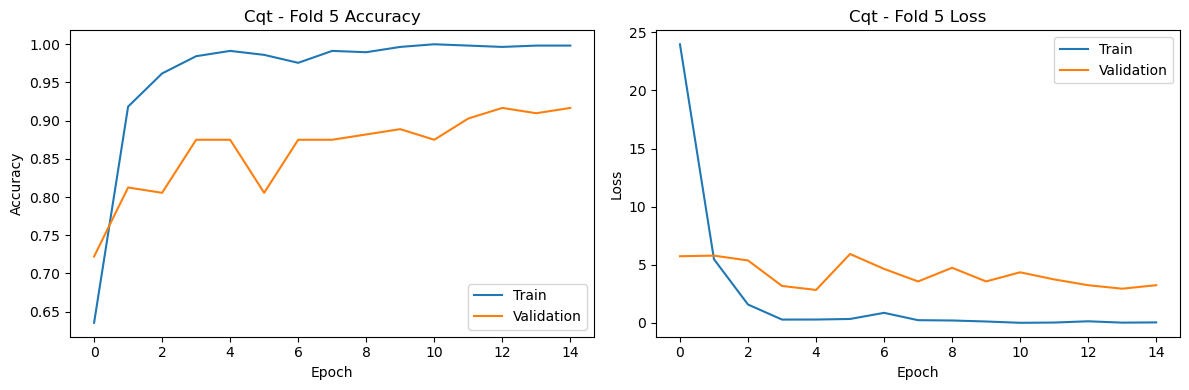


Stft Training History


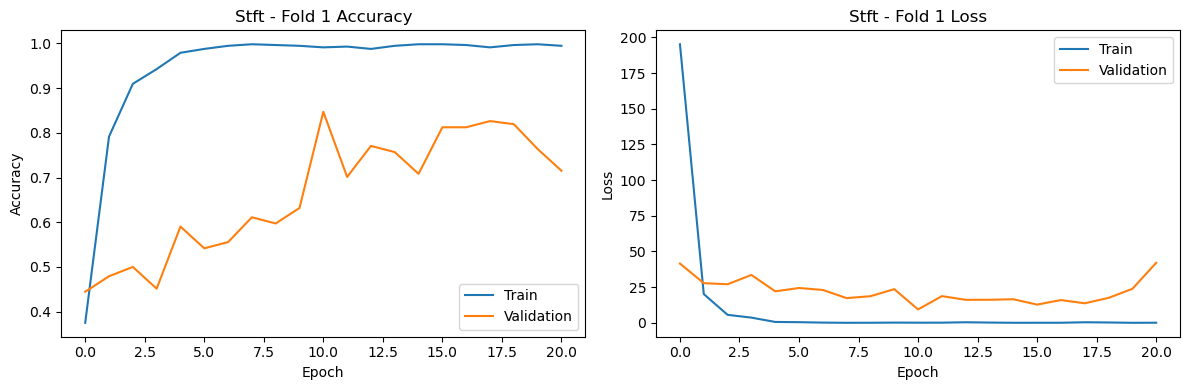

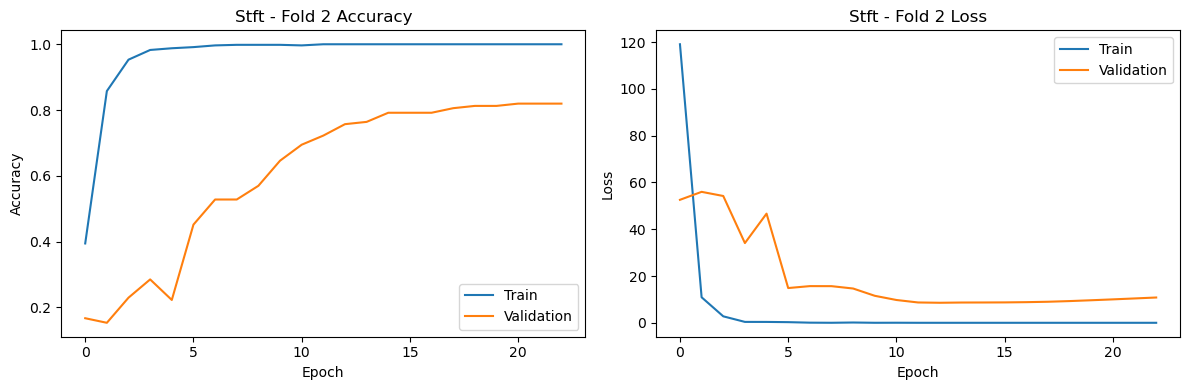

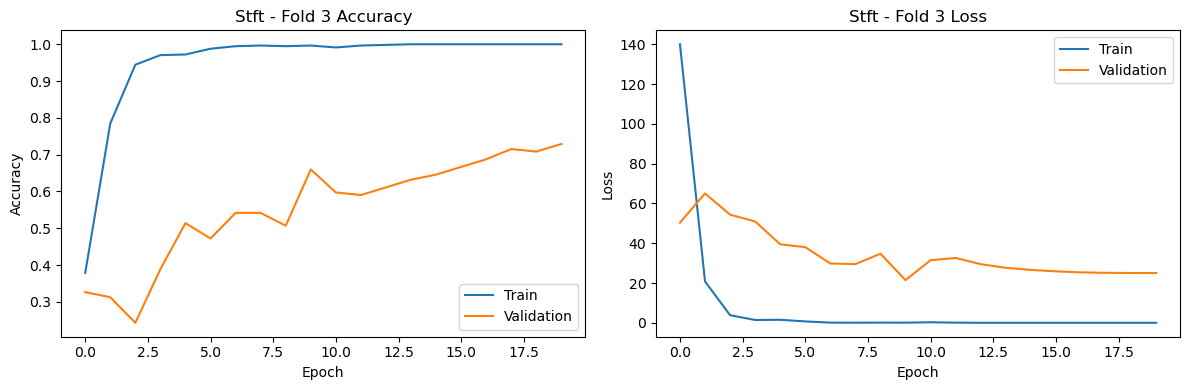

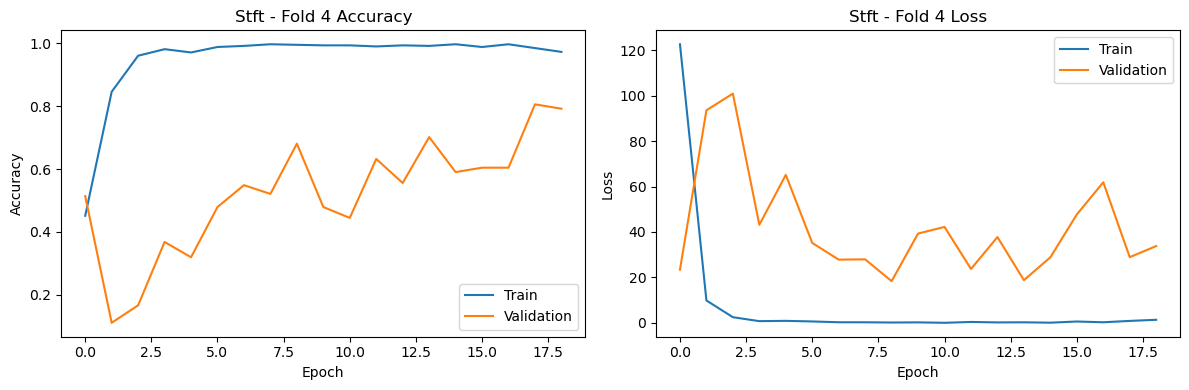

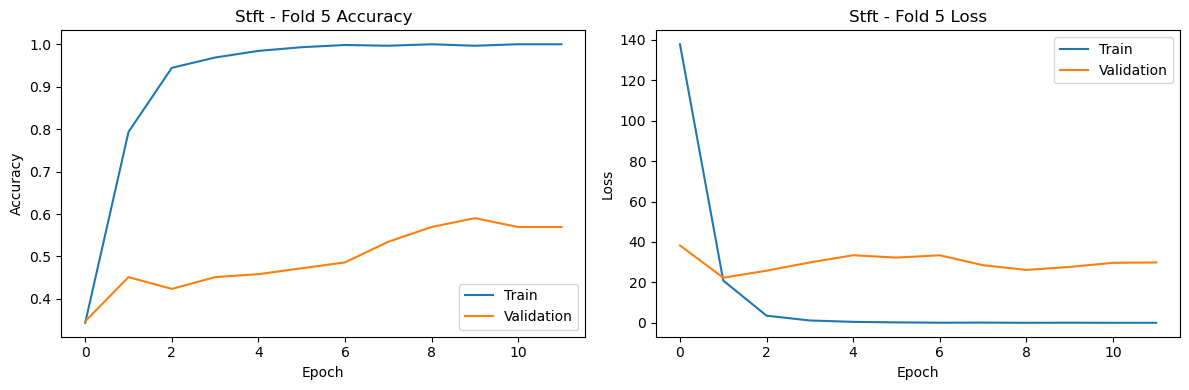


Harmonic Percussive Training History


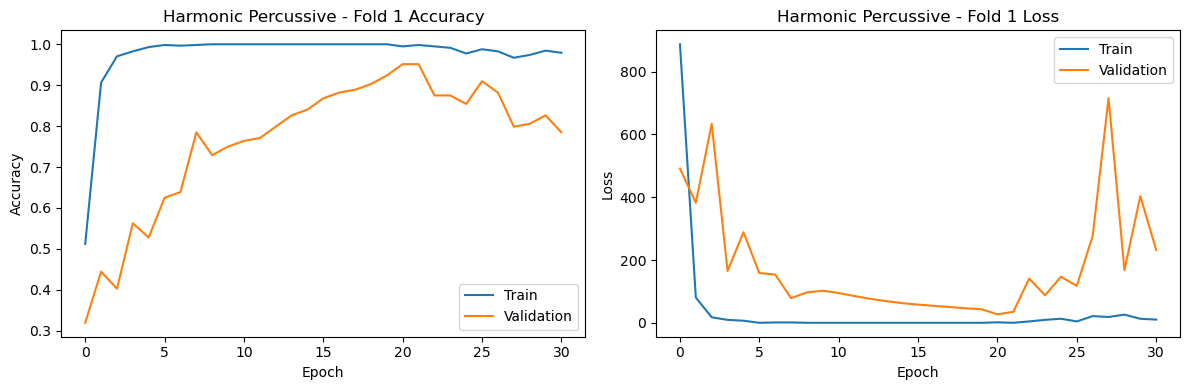

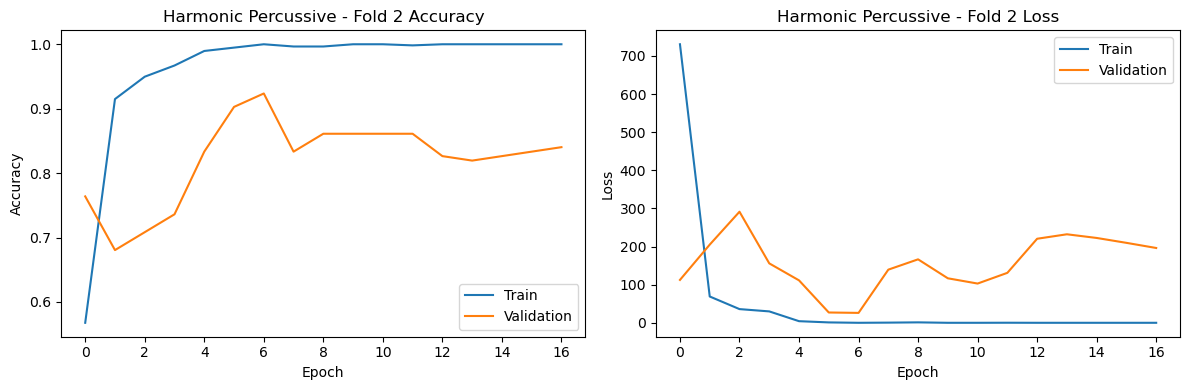

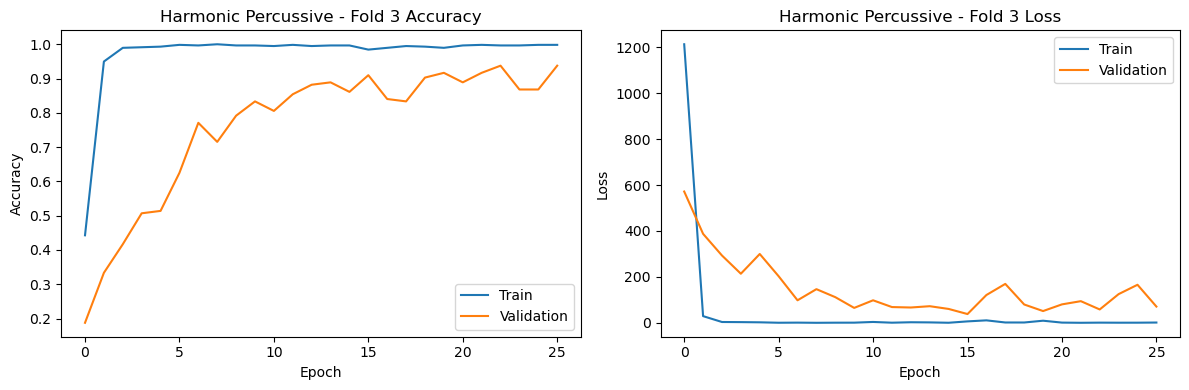

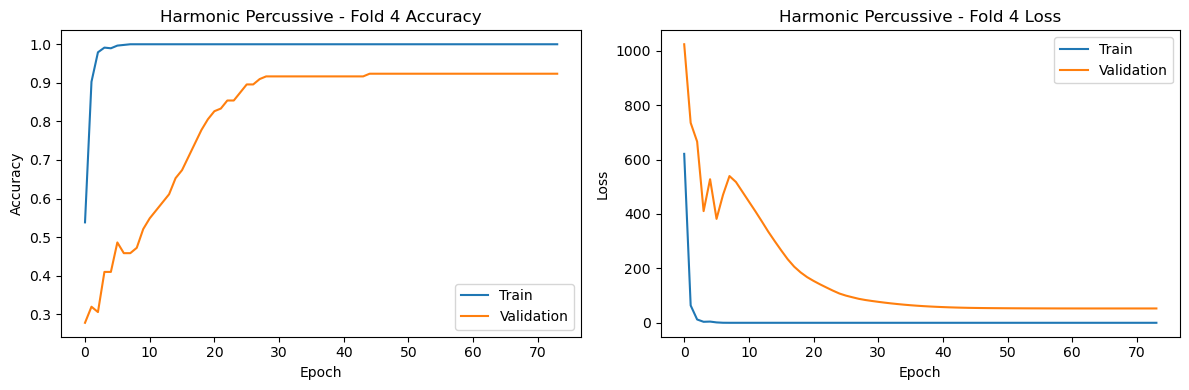

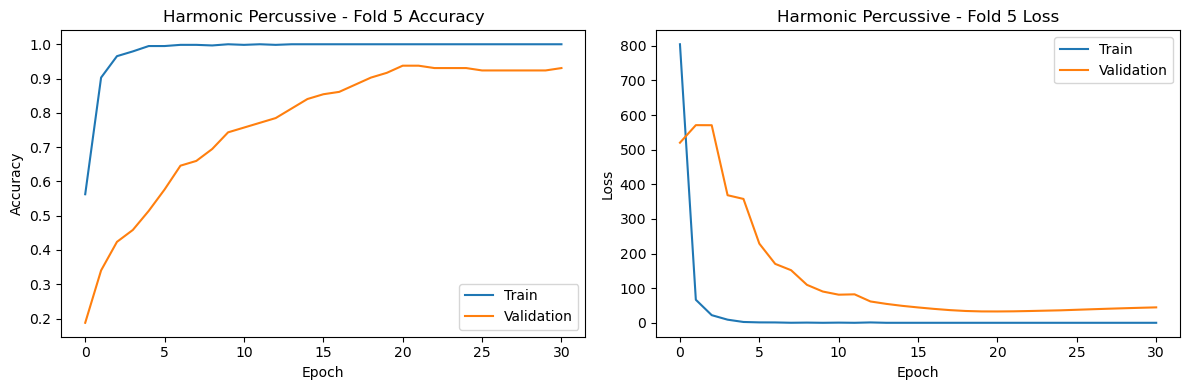


Onset Strength Training History


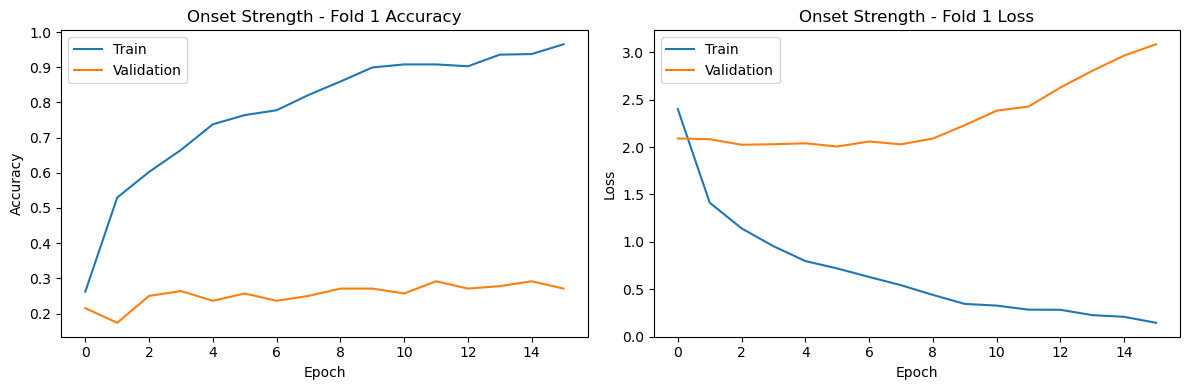

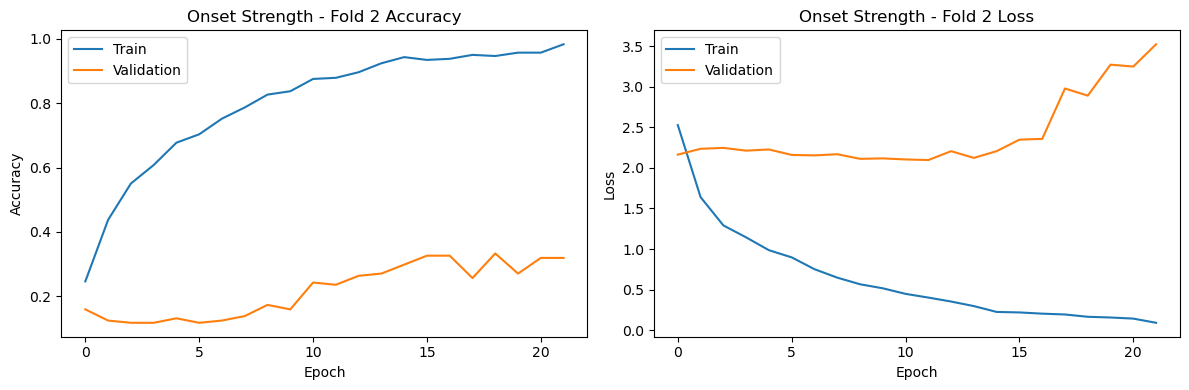

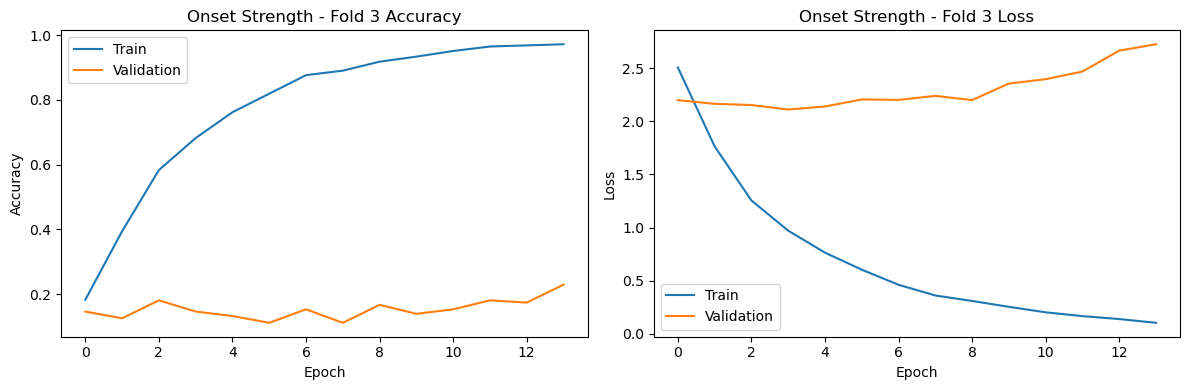

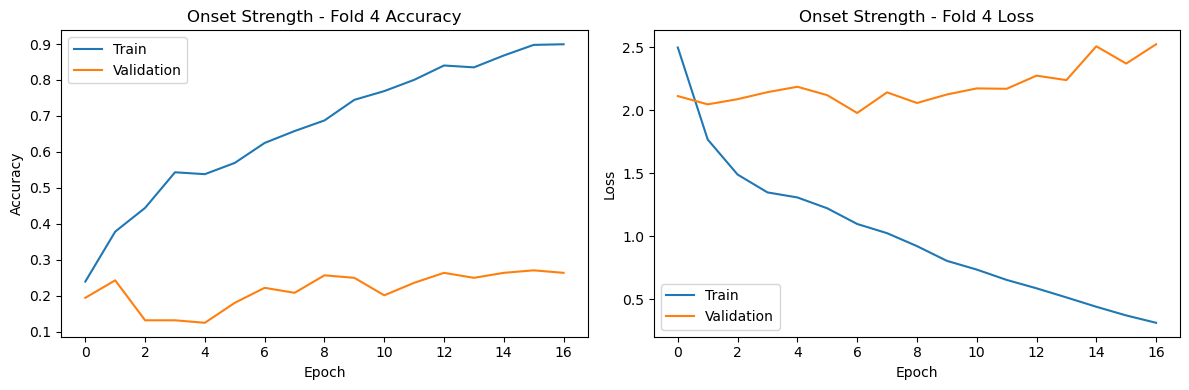

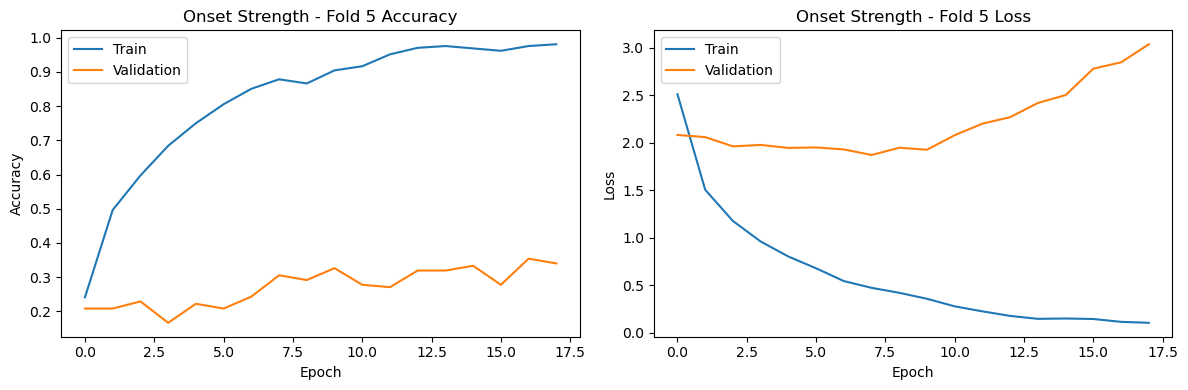

In [10]:
# Plot training/validation accuracy and loss for each model and fold
for feature_type, results in individual_results.items():
    histories = results.get('histories', [])
    if not histories:
        continue
    print(f"\n{'='*40}\n{feature_type.replace('_', ' ').title()} Training History\n{'='*40}")
    for fold, history in enumerate(histories):
        plt.figure(figsize=(12, 4))
        # Accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history.get("accuracy", []), label="Train")
        plt.plot(history.get("val_accuracy", []), label="Validation")
        plt.title(f"{feature_type.replace('_', ' ').title()} - Fold {fold+1} Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        # Loss
        plt.subplot(1, 2, 2)
        plt.plot(history.get("loss", []), label="Train")
        plt.plot(history.get("val_loss", []), label="Validation")
        plt.title(f"{feature_type.replace('_', ' ').title()} - Fold {fold+1} Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.tight_layout()
        plt.show()

In [11]:
# Get best individual model by mean accuracy
best_model = performance_df.iloc[0]['Feature Type'].replace(' ', '_').lower()
ensemble_acc = np.array(ensemble_results['accuracy_list'])
individual_acc = np.array(individual_results[best_model]['accuracy_list'])

t_stat, p_val = ttest_rel(ensemble_acc, individual_acc)
print(f"Paired t-test p-value (ensemble vs best individual): {p_val:.4e}")
if p_val < 0.05:
    print("Difference is statistically significant (p < 0.05)")
else:
    print("Difference is NOT statistically significant (p >= 0.05)")

Paired t-test p-value (ensemble vs best individual): 2.0965e-03
Difference is statistically significant (p < 0.05)


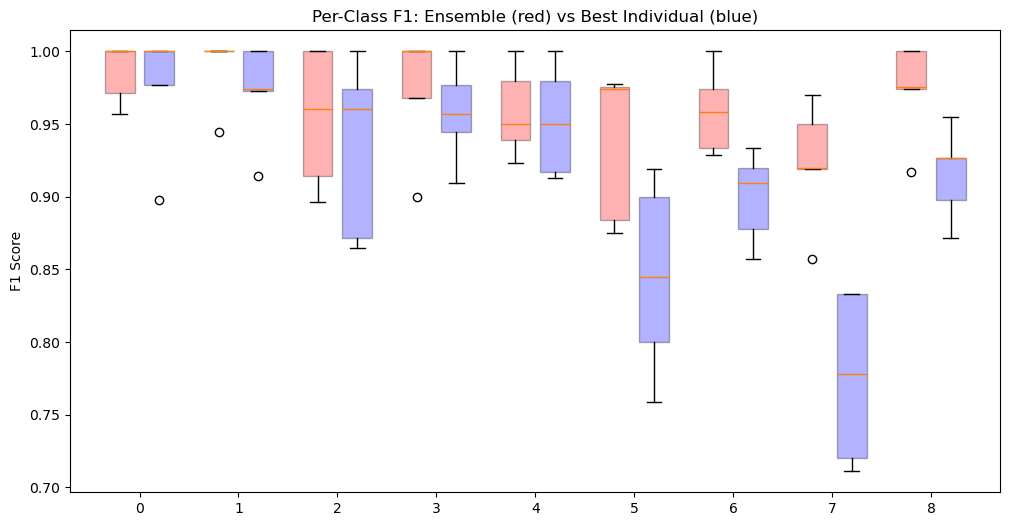

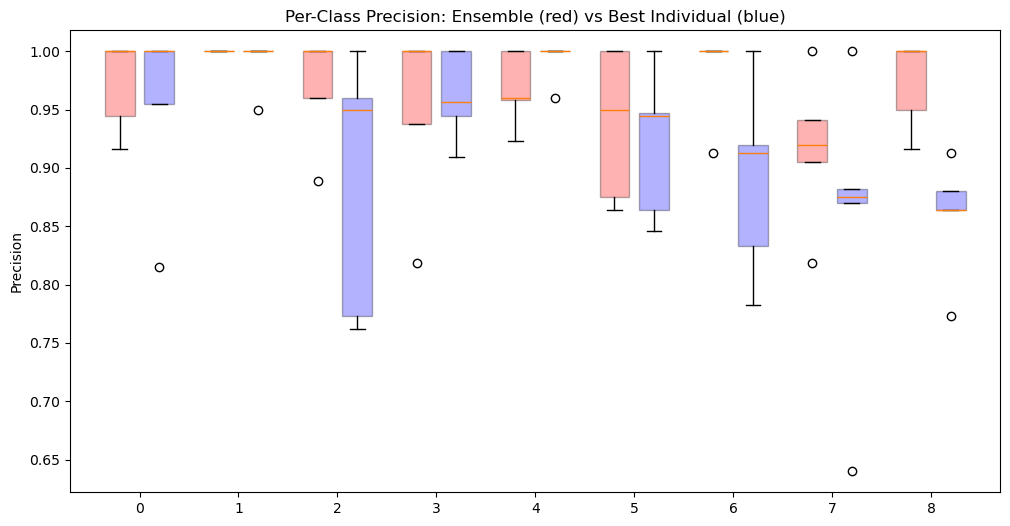

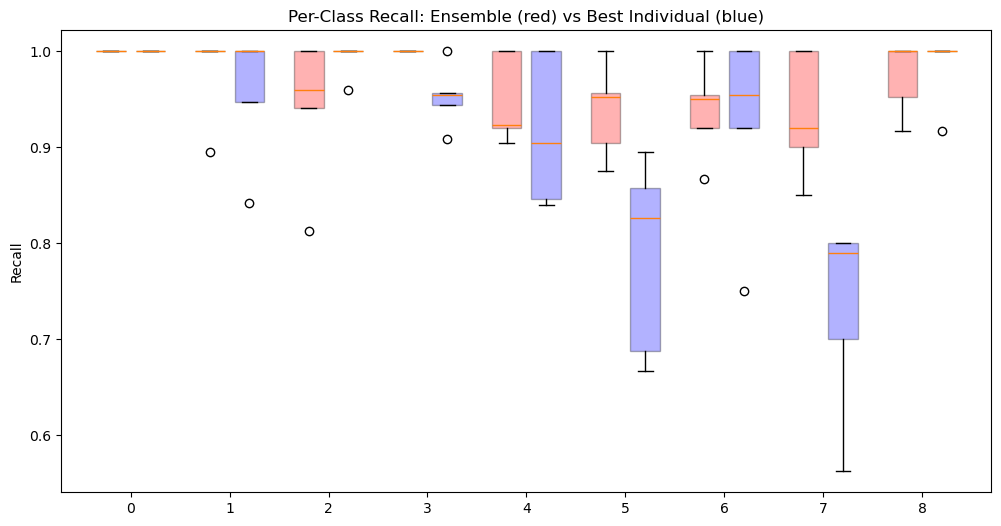

In [12]:
# Compare per-class F1, Precision, Recall between ensemble and best individual model
best_model = performance_df.iloc[0]['Feature Type'].replace(' ', '_').lower()
ensemble_f1, individual_f1 = [], []
ensemble_prec, individual_prec = [], []
ensemble_rec, individual_rec = [], []
class_labels = None

for fold in range(len(ensemble_results['classification_reports'])):
    e_report = ensemble_results['classification_reports'][fold]
    i_report = individual_results[best_model]['classification_reports'][fold]
    if class_labels is None:
        class_labels = [k for k in e_report.keys() if k.isdigit()]
    ensemble_f1.append([e_report[c]['f1-score'] for c in class_labels])
    individual_f1.append([i_report[c]['f1-score'] for c in class_labels])
    ensemble_prec.append([e_report[c]['precision'] for c in class_labels])
    individual_prec.append([i_report[c]['precision'] for c in class_labels])
    ensemble_rec.append([e_report[c]['recall'] for c in class_labels])
    individual_rec.append([i_report[c]['recall'] for c in class_labels])

ensemble_f1 = np.array(ensemble_f1)
individual_f1 = np.array(individual_f1)
ensemble_prec = np.array(ensemble_prec)
individual_prec = np.array(individual_prec)
ensemble_rec = np.array(ensemble_rec)
individual_rec = np.array(individual_rec)

plt.figure(figsize=(12, 6))
plt.boxplot([ensemble_f1[:,i] for i in range(len(class_labels))], positions=np.arange(len(class_labels))-0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='red', alpha=0.3), labels=class_labels)
plt.boxplot([individual_f1[:,i] for i in range(len(class_labels))], positions=np.arange(len(class_labels))+0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.3))
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.ylabel('F1 Score')
plt.title('Per-Class F1: Ensemble (red) vs Best Individual (blue)')
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot([ensemble_prec[:,i] for i in range(len(class_labels))], positions=np.arange(len(class_labels))-0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='red', alpha=0.3), labels=class_labels)
plt.boxplot([individual_prec[:,i] for i in range(len(class_labels))], positions=np.arange(len(class_labels))+0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.3))
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.ylabel('Precision')
plt.title('Per-Class Precision: Ensemble (red) vs Best Individual (blue)')
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot([ensemble_rec[:,i] for i in range(len(class_labels))], positions=np.arange(len(class_labels))-0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='red', alpha=0.3), labels=class_labels)
plt.boxplot([individual_rec[:,i] for i in range(len(class_labels))], positions=np.arange(len(class_labels))+0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.3))
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.ylabel('Recall')
plt.title('Per-Class Recall: Ensemble (red) vs Best Individual (blue)')
plt.show()

In [13]:
# Show top-3 most confused class pairs for ensemble and best individual (by sum of off-diagonal confusion)
def top_confusions(conf_matrices, class_labels, top_n=3):
    total_conf = np.sum(np.array(conf_matrices), axis=0)
    np.fill_diagonal(total_conf, 0)
    flat = total_conf.flatten()
    top_idx = flat.argsort()[-top_n:][::-1]
    for idx in top_idx:
        i, j = divmod(idx, total_conf.shape[1])
        print(f"True: {class_labels[i]}, Pred: {class_labels[j]}, Count: {total_conf[i, j]}")

print("Top 3 most confused class pairs (Ensemble):")
top_confusions(ensemble_results['confusion_matrices'], class_labels)

print("\nTop 3 most confused class pairs (Best Individual):")
top_confusions(individual_results[best_model]['confusion_matrices'], class_labels)

Top 3 most confused class pairs (Ensemble):
True: 7, Pred: 5, Count: 4
True: 7, Pred: 2, Count: 2
True: 4, Pred: 7, Count: 2

Top 3 most confused class pairs (Best Individual):
True: 7, Pred: 8, Count: 10
True: 5, Pred: 7, Count: 8
True: 7, Pred: 2, Count: 5


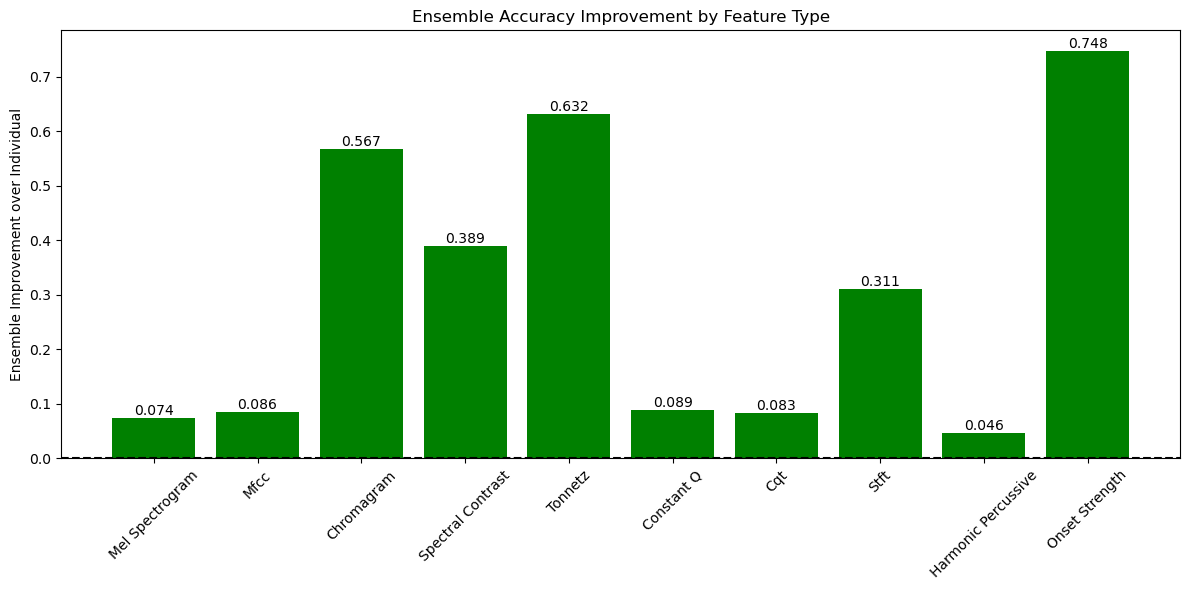

In [14]:
# Bar plot of (ensemble accuracy - individual accuracy) per feature type
improvements = []
for ft in FEATURE_TYPES:
    if ft in individual_results:
        individual_mean = np.mean(individual_results[ft]['accuracy_list'])
        improvement = np.mean(ensemble_results['accuracy_list']) - individual_mean
        improvements.append(improvement)
    else:
        improvements.append(np.nan)

plt.figure(figsize=(12, 6))
bars = plt.bar([ft.replace('_', ' ').title() for ft in FEATURE_TYPES], improvements, color=['green' if imp > 0 else 'red' for imp in improvements])
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('Ensemble Improvement over Individual')
plt.title('Ensemble Accuracy Improvement by Feature Type')
plt.xticks(rotation=45)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{improvements[i]:.3f}", ha='center', va='bottom' if improvements[i] > 0 else 'top')
plt.tight_layout()
plt.show()

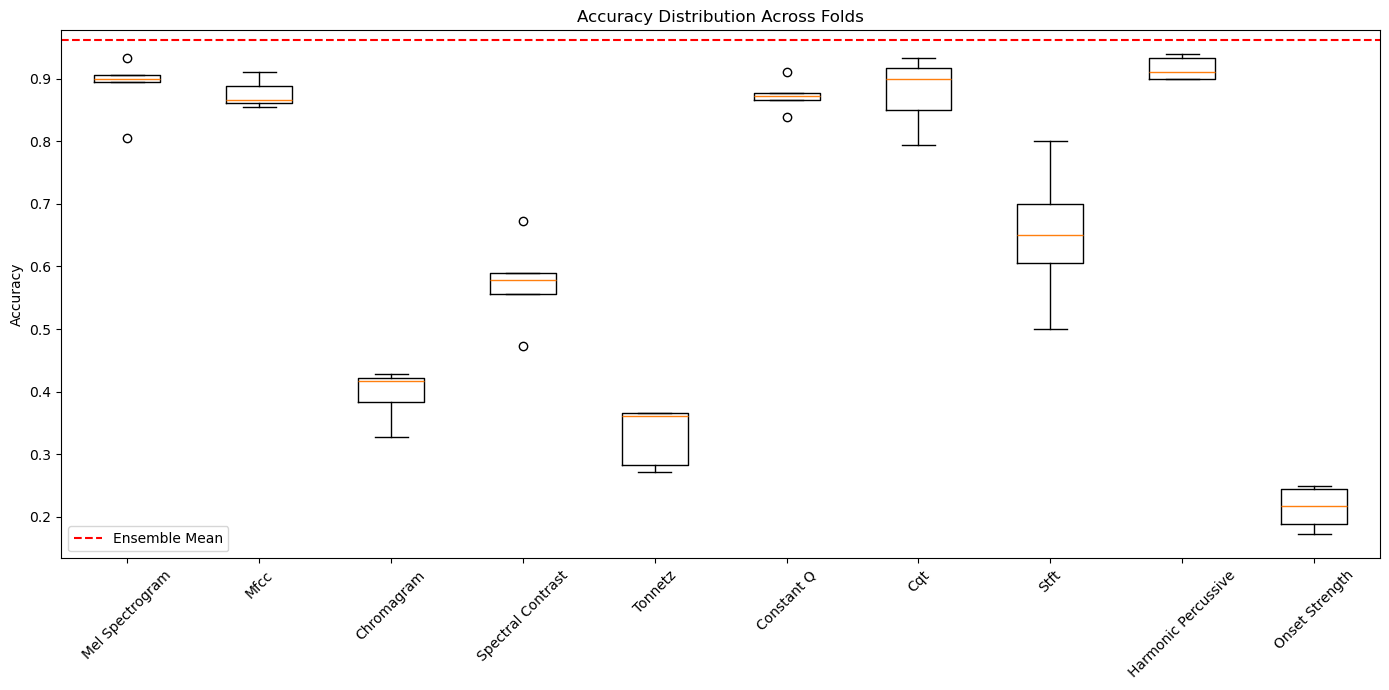

In [15]:
# Boxplot of accuracy distributions across folds for each model and the ensemble
data_for_box = [individual_results[ft]['accuracy_list'] for ft in FEATURE_TYPES if ft in individual_results]
labels = [ft.replace('_', ' ').title() for ft in FEATURE_TYPES if ft in individual_results]

plt.figure(figsize=(14, 7))
plt.boxplot(data_for_box, labels=labels)
plt.axhline(np.mean(ensemble_results['accuracy_list']), color='red', linestyle='--', label='Ensemble Mean')
plt.ylabel('Accuracy')
plt.title('Accuracy Distribution Across Folds')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Show the worst and best performing fold for each model and the ensemble
print("Worst and Best Fold Accuracies:")
for ft in FEATURE_TYPES:
    if ft in individual_results:
        accs = individual_results[ft]['accuracy_list']
        print(f"{ft.replace('_', ' ').title()}: Min={np.min(accs):.4f}, Max={np.max(accs):.4f}")
ensemble_accs = ensemble_results['accuracy_list']
print(f"Ensemble: Min={np.min(ensemble_accs):.4f}, Max={np.max(ensemble_accs):.4f}")

Worst and Best Fold Accuracies:
Mel Spectrogram: Min=0.8056, Max=0.9333
Mfcc: Min=0.8556, Max=0.9111
Chromagram: Min=0.3278, Max=0.4278
Spectral Contrast: Min=0.4722, Max=0.6722
Tonnetz: Min=0.2722, Max=0.3667
Constant Q: Min=0.8389, Max=0.9111
Cqt: Min=0.7944, Max=0.9333
Stft: Min=0.5000, Max=0.8000
Harmonic Percussive: Min=0.9000, Max=0.9389
Onset Strength: Min=0.1722, Max=0.2500
Ensemble: Min=0.9222, Max=0.9889
